In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/gdrive')

df = pd.read_csv('gdrive/My Drive/steam-games.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
pd.set_option('display.max_columns', None)
df.head(10)

,app_id,title,release_date,genres,categories,developer,publisher,original_price,discount_percentage,discounted_price,dlc_available,age_rating,content_descriptor,about_description,win_support,mac_support,linux_support,awards,overall_review,overall_review_%,overall_review_count,recent_review,recent_review_%,recent_review_count
0,730,Counter-Strike 2,"21 Aug, 2012","Action, Free to Play","Cross-Platform Multiplayer, Steam Trading Card...",Valve,Valve,NaN,NaN,Free,1,0,NaN,"For over two decades, Counter-Strike has offer...",True,False,True,1,Very Positive,87.0,8062218.0,Mostly Positive,79.0,57466.0
1,570,Dota 2,"9 Jul, 2013","Action, Strategy, Free to Play","Steam Trading Cards, Steam Workshop, SteamVR C...",Valve,Valve,NaN,NaN,Free,2,0,NaN,"Every day, millions of players worldwide enter...",True,True,True,0,Very Positive,81.0,2243112.0,Mostly Positive,72.0,23395.0
2,2215430,Ghost of Tsushima DIRECTOR'S CUT,"16 May, 2024","Action, Adventure","Single-player, Online Co-op, Steam Achievement...",Sucker Punch Productions,PlayStation PC LLC,NaN,NaN,"₹3,999.00",0,1,Violence,A storm is coming. Venture into the complete G...,True,False,False,0,Very Positive,89.0,12294.0,NaN,NaN,NaN
3,1245620,ELDEN RING,"24 Feb, 2022","Action, RPG","Single-player, Online PvP, Online Co-op, Steam...",FromSoftware Inc.,FromSoftware Inc.,NaN,NaN,"₹3,599.00",2,1,Violence,"THE NEW FANTASY ACTION RPG. Rise, Tarnished, a...",True,False,False,6,Very Positive,93.0,605191.0,Very Positive,94.0,7837.0
4,1085660,Destiny 2,"1 Oct, 2019","Action, Adventure, Free to Play","Single-player, Online PvP, Online Co-op, Steam...",Bungie,Bungie,NaN,NaN,Free,14,1,"Violence, In game purchases",Destiny 2 is an action MMO with a single evolv...,True,False,False,0,Very Positive,80.0,594713.0,Mostly Positive,73.0,4845.0
5,1091500,Cyberpunk 2077,"9 Dec, 2020",RPG,"Single-player, Steam Achievements, Steam Tradi...",CD PROJEKT RED,CD PROJEKT RED,"₹2,999.00",-50%,"₹1,499.00",3,1,"Violence, Sex, Bad Language","Cyberpunk 2077 is an open-world, action-advent...",True,False,False,4,Very Positive,83.0,654304.0,Very Positive,94.0,7771.0
6,1086940,Baldur's Gate 3,"3 Aug, 2023","Adventure, RPG, Strategy","Single-player, Online Co-op, LAN Co-op, Steam ...",Larian Studios,Larian Studios,NaN,NaN,"₹2,999.00",1,1,"Violence, Bad Language, Sex","Baldur’s Gate 3 is a story-rich, party-based R...",True,True,False,2,Overwhelmingly Positive,96.0,543077.0,Overwhelmingly Positive,96.0,9642.0
7,578080,PUBG: BATTLEGROUNDS,"21 Dec, 2017","Action, Adventure, Massively Multiplayer, Free...","Online PvP, Stats, Remote Play on Phone, Remot...","KRAFTON, Inc.","KRAFTON, Inc.",NaN,NaN,Free,0,0,NaN,Play PUBG: BATTLEGROUNDS for free. Land on str...,True,False,False,1,Mixed,58.0,2361734.0,Mixed,68.0,19214.0
8,1172470,Apex Legends™,"4 Nov, 2020","Action, Adventure, Free to Play","Online PvP, Online Co-op, Steam Achievements, ...",Respawn,Electronic Arts,NaN,NaN,Free,0,1,"Violence, In-Game Purchases","Apex Legends is the award-winning, free-to-pla...",True,False,False,2,Mostly Positive,77.0,828477.0,Mixed,60.0,11524.0
9,1142710,Total War: WARHAMMER III,"16 Feb, 2022","Action, Strategy","Single-player, Online PvP, LAN PvP, Online Co-...",CREATIVE ASSEMBLY,SEGA,"₹4,499.00",-50%,"₹2,249.00",23,1,Violence,The cataclysmic conclusion to the Total War: W...,True,True,True,0,Mixed,65.0,70065.0,Very Positive,86.0,1593.0


In [4]:
df.columns

Index(['app_id', 'title', 'release_date', 'genres', 'categories', 'developer',
       'publisher', 'original_price', 'discount_percentage',
       'discounted_price', 'dlc_available', 'age_rating', 'content_descriptor',
       'about_description', 'win_support', 'mac_support', 'linux_support',
       'awards', 'overall_review', 'overall_review_%', 'overall_review_count',
       'recent_review', 'recent_review_%', 'recent_review_count'],
      dtype='object')

In [5]:
df.dtypes

,0
app_id,int64
title,object
release_date,object
genres,object
categories,object
developer,object
publisher,object
original_price,object
discount_percentage,object
discounted_price,object


In [6]:
df.shape

(42497, 24)

Observations:

* There are 42,497 rows and 24 columns.  
* There are different genres in for each game, which need to be split into separate columns, similarly for categories.
*   Prices are in rupees, Free values need to be converted to 0.



## Data Processing

### Null Values

In [7]:
#Calculate the proportion of null values in each column
missing = df.isnull().sum()
missing_percentage = (missing / len(df)) * 100

# Create a DataFrame with missing values and their percentages
missing_df = pd.DataFrame({'Missing Values': missing, 'Percentage': missing_percentage})

# Sort the DataFrame by the number of missing values in descending order
missing_df = missing_df.sort_values(by='Missing Values', ascending=True)
missing_df['Missing Values'] = missing_df['Missing Values'].apply(lambda x: f"{x:,}")

# Format the 'Percentage' column to include the percentage symbol
missing_df['Percentage'] = missing_df['Percentage'].apply(lambda x: f"{x:.2f}%")

missing_df


,Missing Values,Percentage
app_id,0,0.00%
title,0,0.00%
dlc_available,0,0.00%
age_rating,0,0.00%
mac_support,0,0.00%
win_support,0,0.00%
awards,0,0.00%
linux_support,0,0.00%
categories,45,0.11%
release_date,57,0.13%


In [8]:
# Calculate the number of non-null values in each column
non_null_counts = df.notnull().sum()

# Create a DataFrame with non-null values
non_null_df = pd.DataFrame({'Non-Null Values': non_null_counts})

# Sort the DataFrame by the number of missing values in descending order
non_null_df = non_null_df.sort_values(by='Non-Null Values', ascending=True)
# Format the non-null values in thousands
non_null_df['Non-Null Values'] = non_null_df['Non-Null Values'].apply(lambda x: f"{x:,}")

non_null_df

,Non-Null Values
content_descriptor,"2,375"
original_price,"4,859"
discount_percentage,"4,859"
recent_review_%,"5,503"
recent_review_count,"5,503"
recent_review,"5,503"
overall_review_%,"40,020"
overall_review,"40,020"
overall_review_count,"40,020"
discounted_price,"42,257"


Observations
* Based on the percentage of null values in the dataset, remove the following columns which are mostly null: original_price, discount_percentage, content_descriptor, recent_review columns.

In [9]:
df = df.drop(columns = ['original_price', 'discount_percentage', 'content_descriptor', 'recent_review','recent_review_%', 'recent_review_count'])

In [10]:
print("The new df is shaped: ",df.shape)

The new df is shaped:  (42497, 18)


In [11]:
df.head(5)

,app_id,title,release_date,genres,categories,developer,publisher,discounted_price,dlc_available,age_rating,about_description,win_support,mac_support,linux_support,awards,overall_review,overall_review_%,overall_review_count
0,730,Counter-Strike 2,"21 Aug, 2012","Action, Free to Play","Cross-Platform Multiplayer, Steam Trading Card...",Valve,Valve,Free,1,0,"For over two decades, Counter-Strike has offer...",True,False,True,1,Very Positive,87.0,8062218.0
1,570,Dota 2,"9 Jul, 2013","Action, Strategy, Free to Play","Steam Trading Cards, Steam Workshop, SteamVR C...",Valve,Valve,Free,2,0,"Every day, millions of players worldwide enter...",True,True,True,0,Very Positive,81.0,2243112.0
2,2215430,Ghost of Tsushima DIRECTOR'S CUT,"16 May, 2024","Action, Adventure","Single-player, Online Co-op, Steam Achievement...",Sucker Punch Productions,PlayStation PC LLC,"₹3,999.00",0,1,A storm is coming. Venture into the complete G...,True,False,False,0,Very Positive,89.0,12294.0
3,1245620,ELDEN RING,"24 Feb, 2022","Action, RPG","Single-player, Online PvP, Online Co-op, Steam...",FromSoftware Inc.,FromSoftware Inc.,"₹3,599.00",2,1,"THE NEW FANTASY ACTION RPG. Rise, Tarnished, a...",True,False,False,6,Very Positive,93.0,605191.0
4,1085660,Destiny 2,"1 Oct, 2019","Action, Adventure, Free to Play","Single-player, Online PvP, Online Co-op, Steam...",Bungie,Bungie,Free,14,1,Destiny 2 is an action MMO with a single evolv...,True,False,False,0,Very Positive,80.0,594713.0


App ID and title will also not be used as features.


<ipython-input-12-736db4bba916>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='overall_review', y='awards', data=df, palette='husl')


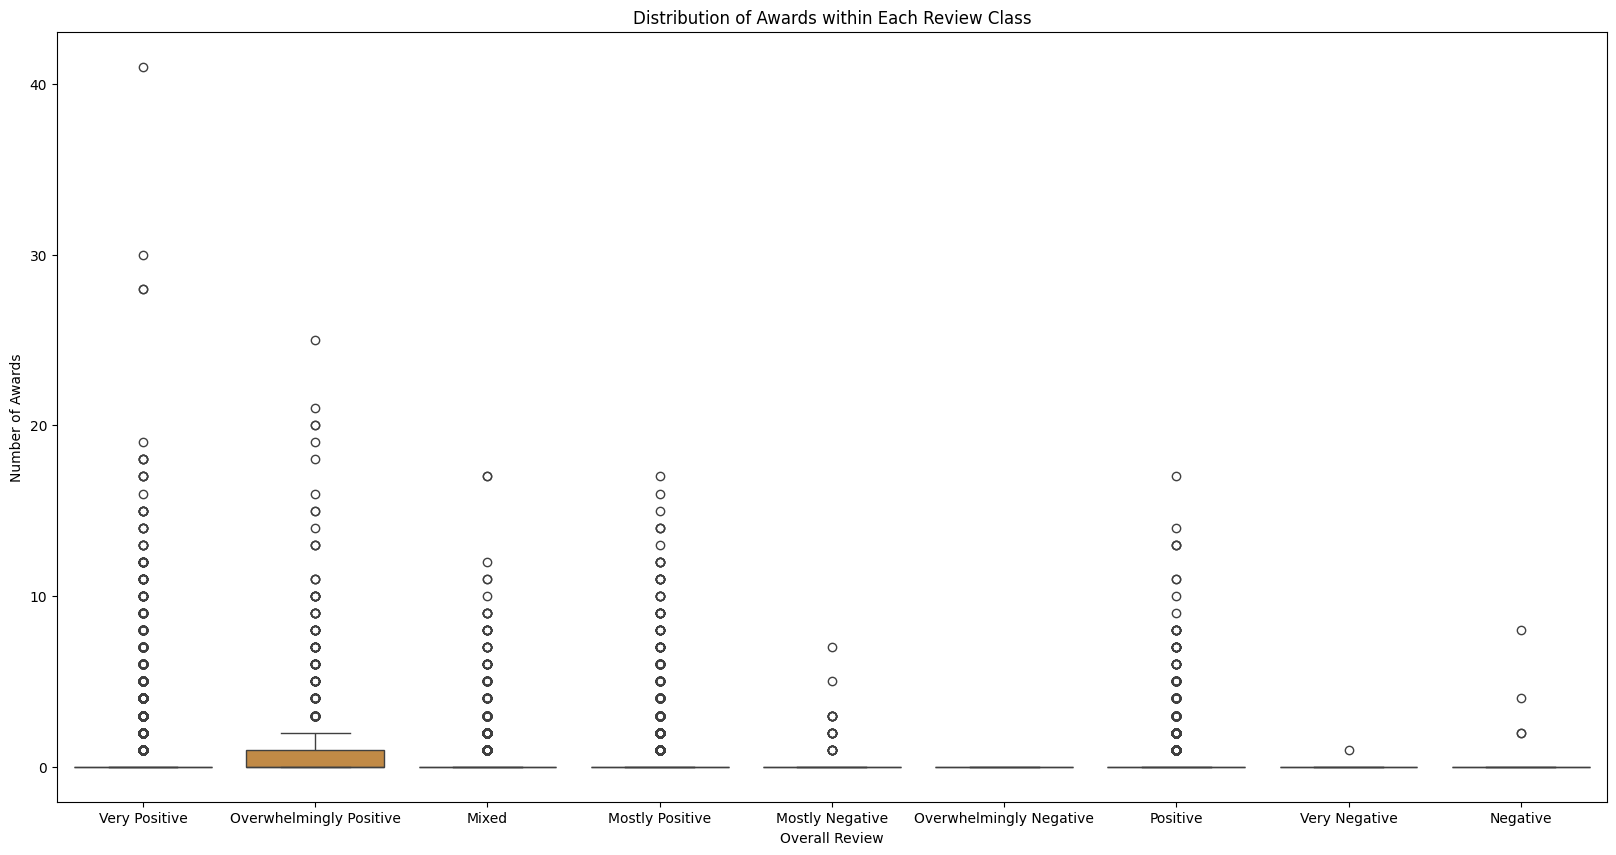

In [12]:
# Plotting
plt.figure(figsize=(20, 10))
sns.boxplot(x='overall_review', y='awards', data=df, palette='husl')
plt.xlabel('Overall Review')
plt.ylabel('Number of Awards')
plt.title('Distribution of Awards within Each Review Class')
plt.show()

It's clear that reviews that are overwhelmingly positive and very positive have a high number of awards received.

In [13]:
df['age_rating'].unique()

array([0, 1])

Publisher and developer

In [14]:
# Check for equality between publisher and developer
df['same_publisher_developer'] = df['developer'] == df['publisher']
# Count the number of games where publisher and developer are the same
same_count = df['same_publisher_developer'].sum()

# Total number of games
total_games = df.shape[0]

# Percentage of games where publisher and developer are the same
percentage_same = (same_count / total_games) * 100

print(f'Total number of games: {total_games}')
print(f'Number of games where publisher and developer are the same: {same_count}')
print(f'Percentage of games with the same publisher and developer: {percentage_same:.2f}%')

Total number of games: 42497
Number of games where publisher and developer are the same: 28112
Percentage of games with the same publisher and developer: 66.15%


In [15]:
df['developer'].nunique()

25126

In [16]:
df['publisher'].nunique()

20986

The data was scraped on 9th, May 2024. Print the games that have release dates post this date.

Invalid dates such as Apr 2019.

In [17]:
from datetime import datetime
# Convert release_date to datetime, coercing errors
df['release_date'] = pd.to_datetime(df['release_date'], format='%d %b, %Y', errors='coerce')

# Calculate the age of the game
current_date = datetime.now()
df['age_of_game'] = df['release_date'].apply(lambda x: current_date.year - x.year if pd.notnull(x) else None)

# Clean discounted_price column
df['discounted_price'] = df['discounted_price'].replace('Free', '0')
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)

In [18]:
# Filter the dataframe for games with release dates after the cutoff date
df[df['release_date'] > pd.to_datetime('2024-05-09')]

,app_id,title,release_date,genres,categories,developer,publisher,discounted_price,dlc_available,age_rating,about_description,win_support,mac_support,linux_support,awards,overall_review,overall_review_%,overall_review_count,same_publisher_developer,age_of_game
2,2215430,Ghost of Tsushima DIRECTOR'S CUT,2024-05-16,"Action, Adventure","Single-player, Online Co-op, Steam Achievement...",Sucker Punch Productions,PlayStation PC LLC,3999.0,0,1,A storm is coming. Venture into the complete G...,True,False,False,0,Very Positive,89.0,12294.0,False,0.0
38,2461850,Senua’s Saga: Hellblade II,2024-05-21,"Action, Adventure","Single-player, Steam Achievements, Captions av...",Ninja Theory,Xbox Game Studios,4399.0,0,1,The sequel to the award winning Hellblade: Sen...,True,False,False,0,Very Positive,87.0,1685.0,False,0.0
93,867210,Songs of Conquest,2024-05-20,"Adventure, RPG, Strategy","Single-player, Online PvP, Shared/Split Screen...",Lavapotion,Coffee Stain Publishing,719.0,3,0,"Raise mighty armies, wield ancient magic and f...",True,True,False,4,Very Positive,87.0,6759.0,False,0.0
112,1840080,Homeworld 3,2024-05-13,"Simulation, Strategy","Single-player, Online PvP, Online Co-op, Steam...",Blackbird Interactive,Gearbox Publishing,3499.0,3,1,"Tactical, beautiful, and wholly unique, the GO...",True,False,False,0,Mixed,41.0,3432.0,False,0.0
137,1128860,Men of War II,2024-05-15,"Action, Simulation, Strategy","Single-player, Online PvP, Online Co-op, Cross...",Best Way,Fulqrum Publishing,1800.0,3,0,Experience warfare like never before! Men of W...,True,False,True,0,Mixed,61.0,2362.0,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42396,2463360,True Abstraction: Rewind,2024-05-13,"Action, Adventure","Single-player, Steam Achievements, Steam Cloud...",PrismBytes,PrismBytes,345.0,1,0,"Solve puzzles in a secret, Lunar facility, whi...",True,False,True,0,NaN,NaN,NaN,True,0.0
42399,2834430,Pizzakai,2024-05-20,"Action, Casual, Indie","Single-player, Family Sharing, Steam is learni...",Secret Ten Studios,Secret Ten Studios,52.0,0,0,Play as a deceased man by the name of Peppy wh...,True,False,False,0,NaN,NaN,NaN,True,0.0
42431,2921380,Caribbean Crashers,2024-05-10,"Adventure, Casual, Indie, Simulation, Strategy","Single-player, Family Sharing, Steam is learni...",Bloxhill,Bloxhill,52.0,0,0,Embark on a thrilling and strategic adventure ...,True,False,False,0,NaN,NaN,NaN,True,0.0
42442,2973570,Hidden Haunted Town Top-Down 3D,2024-05-22,"Action, Adventure, Casual, Indie, Racing, RPG,...","Single-player, Steam Achievements, Steam Leade...",Top-Down Games,Hede,4740.0,0,0,Find the objects that are hidden on the map.,True,True,True,0,NaN,NaN,NaN,False,0.0


In [19]:
df.shape

(42497, 20)

In [20]:
#remove rows
df = df[df['release_date'] <= pd.to_datetime('2024-05-09')]
df.shape

(41880, 20)

Use the chi-square test to check if there is a relationship between the review and the developer/publisher.

In [21]:
df['win_support'].value_counts()
#since most games support windows, this feature can be dropped

,count
win_support,
True,41877
False,3


In [22]:
df['linux_support'].value_counts()
#a good majority of games dont support linux, this feature can also be dropped

,count
linux_support,
False,34675
True,7205


In [23]:
df['mac_support'].value_counts()

,count
mac_support,
False,31321
True,10559


In [24]:
#check if all app_ids are unique
df['app_id'].is_unique

True

In [25]:
df = df.drop(columns = ['app_id', 'title', 'dlc_available', 'age_rating','win_support', 'mac_support','linux_support'])

In [26]:
df[:275]

,release_date,genres,categories,developer,publisher,discounted_price,about_description,awards,overall_review,overall_review_%,overall_review_count,same_publisher_developer,age_of_game
0,2012-08-21,"Action, Free to Play","Cross-Platform Multiplayer, Steam Trading Card...",Valve,Valve,0.0,"For over two decades, Counter-Strike has offer...",1,Very Positive,87.0,8062218.0,True,12.0
1,2013-07-09,"Action, Strategy, Free to Play","Steam Trading Cards, Steam Workshop, SteamVR C...",Valve,Valve,0.0,"Every day, millions of players worldwide enter...",0,Very Positive,81.0,2243112.0,True,11.0
3,2022-02-24,"Action, RPG","Single-player, Online PvP, Online Co-op, Steam...",FromSoftware Inc.,FromSoftware Inc.,3599.0,"THE NEW FANTASY ACTION RPG. Rise, Tarnished, a...",6,Very Positive,93.0,605191.0,True,2.0
4,2019-10-01,"Action, Adventure, Free to Play","Single-player, Online PvP, Online Co-op, Steam...",Bungie,Bungie,0.0,Destiny 2 is an action MMO with a single evolv...,0,Very Positive,80.0,594713.0,False,5.0
5,2020-12-09,RPG,"Single-player, Steam Achievements, Steam Tradi...",CD PROJEKT RED,CD PROJEKT RED,1499.0,"Cyberpunk 2077 is an open-world, action-advent...",4,Very Positive,83.0,654304.0,True,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,2024-04-01,"Action, Adventure, Casual, Indie, Massively Mu...","Single-player, MMO, Online PvP, Online Co-op, ...",Holyday Studios,Holyday Studios,0.0,Firestone: Online Idle RPG is a multiplayer fa...,0,Mostly Positive,78.0,5603.0,True,0.0
291,2024-05-09,"Action, Indie","Single-player, Steam Achievements, Steam Cloud...",SFB Games,SFB Games,880.0,The year is 1990. It’s been two years since th...,6,Overwhelmingly Positive,99.0,1615.0,True,0.0
292,2017-09-14,"Adventure, RPG, Strategy","Single-player, Online PvP, Shared/Split Screen...",Larian Studios,Larian Studios,989.0,The critically acclaimed RPG that raised the b...,1,Overwhelmingly Positive,95.0,156243.0,True,7.0
293,2021-12-02,"Indie, Simulation, Early Access","Single-player, Steam Workshop, Steam Cloud, In...",Maxim Karpenko,Maxim Karpenko,880.0,WorldBox is the ULTIMATE god simulator and san...,0,Very Positive,94.0,28724.0,True,3.0


In [27]:
df.head(5)

,release_date,genres,categories,developer,publisher,discounted_price,about_description,awards,overall_review,overall_review_%,overall_review_count,same_publisher_developer,age_of_game
0,2012-08-21,"Action, Free to Play","Cross-Platform Multiplayer, Steam Trading Card...",Valve,Valve,0.0,"For over two decades, Counter-Strike has offer...",1,Very Positive,87.0,8062218.0,True,12.0
1,2013-07-09,"Action, Strategy, Free to Play","Steam Trading Cards, Steam Workshop, SteamVR C...",Valve,Valve,0.0,"Every day, millions of players worldwide enter...",0,Very Positive,81.0,2243112.0,True,11.0
3,2022-02-24,"Action, RPG","Single-player, Online PvP, Online Co-op, Steam...",FromSoftware Inc.,FromSoftware Inc.,3599.0,"THE NEW FANTASY ACTION RPG. Rise, Tarnished, a...",6,Very Positive,93.0,605191.0,True,2.0
4,2019-10-01,"Action, Adventure, Free to Play","Single-player, Online PvP, Online Co-op, Steam...",Bungie,Bungie,0.0,Destiny 2 is an action MMO with a single evolv...,0,Very Positive,80.0,594713.0,False,5.0
5,2020-12-09,RPG,"Single-player, Steam Achievements, Steam Tradi...",CD PROJEKT RED,CD PROJEKT RED,1499.0,"Cyberpunk 2077 is an open-world, action-advent...",4,Very Positive,83.0,654304.0,True,4.0


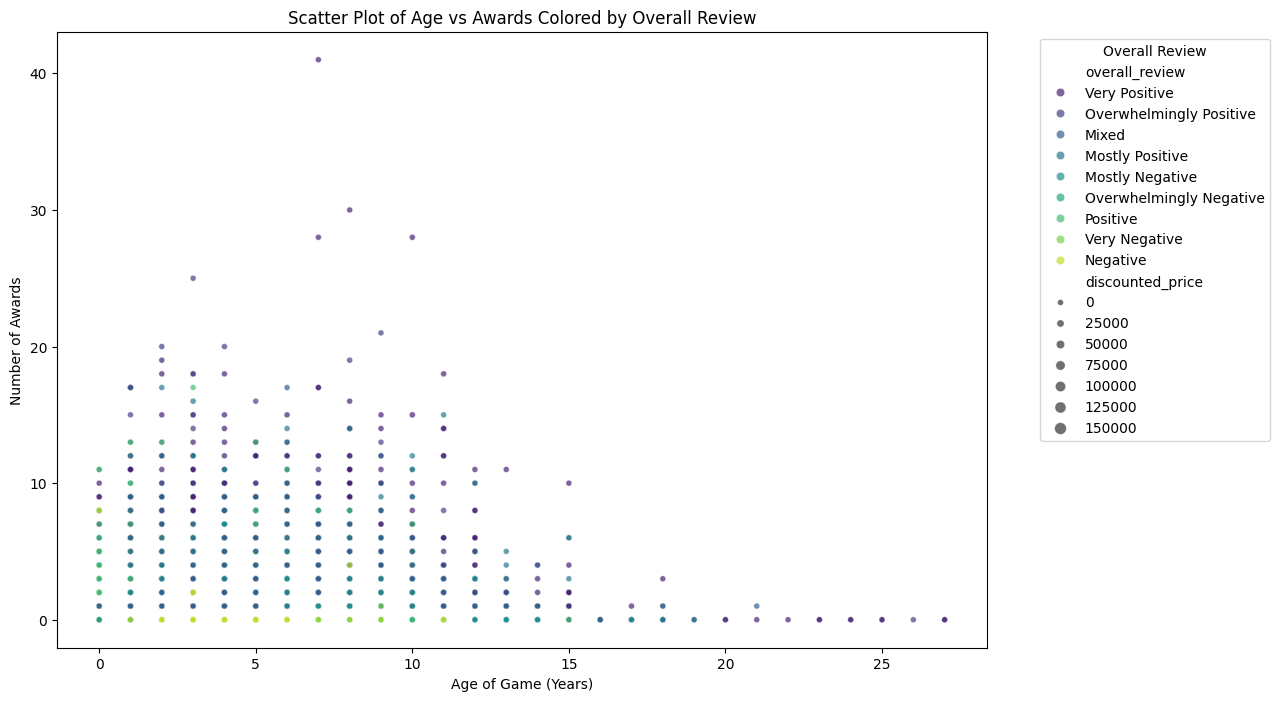

In [28]:
# Plotting
plt.figure(figsize=(12, 8))
#scatter = sns.scatterplot(data=df, x='age', y='awards', hue='overall_review', palette='viridis', s=100)
scatter = sns.scatterplot(data=df, x='age_of_game', y='awards', hue='overall_review', size='discounted_price',palette='viridis', alpha=0.7)

# Adding labels and title
plt.xlabel('Age of Game (Years)')
plt.ylabel('Number of Awards')
plt.title('Scatter Plot of Age vs Awards Colored by Overall Review')

# Adding a legend
plt.legend(title='Overall Review', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Age Distribution: Most of the games appear to have ages ranging from 0 to 15 years. There are a few outliers with higher ages, but the majority seem to be relatively recent.

Awards Distribution: There is a wide range in the number of awards, from 0 up to around 40. It appears that a significant number of games have fewer awards, with some exceptions that have received many.

Clusters: There are some visible clusters of games with specific review ratings and awards. For instance, there are many games with very positive reviews and varying numbers of awards.

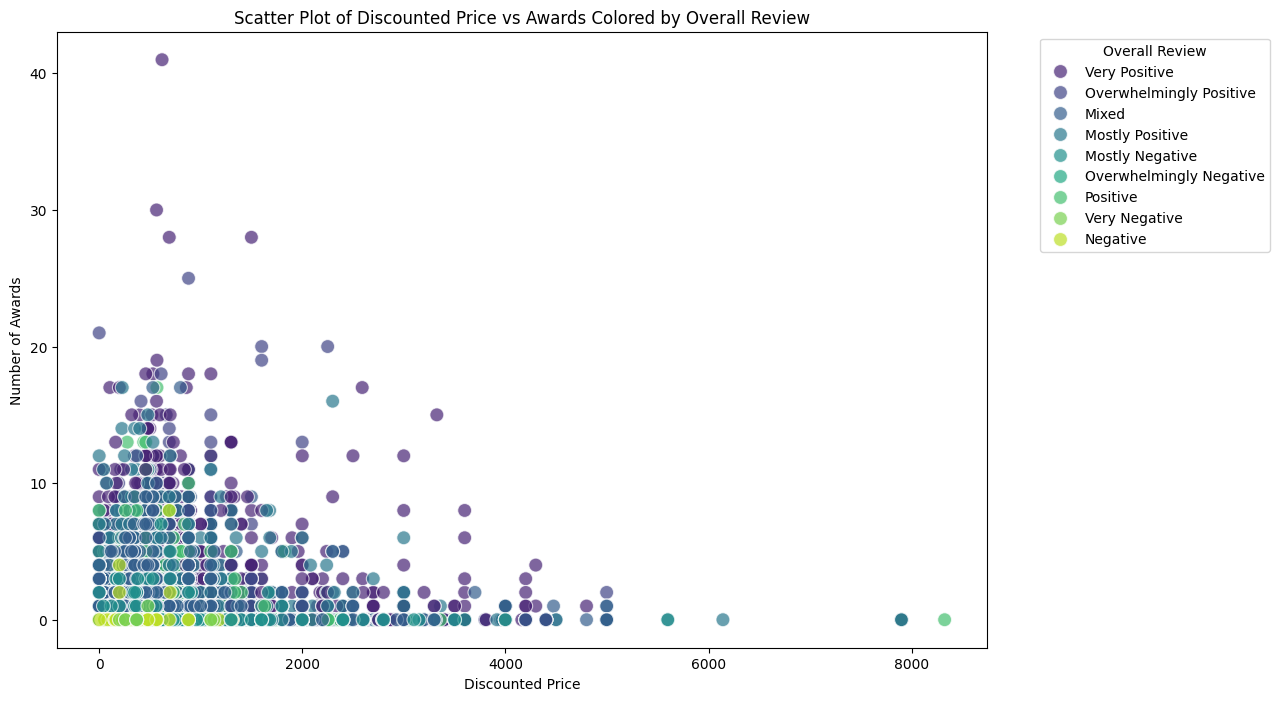

In [29]:
# Plotting
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=df, x='discounted_price', y='awards', hue='overall_review', palette='viridis', s=100,alpha=0.7)

# Adding labels and title
plt.xlabel('Discounted Price')
plt.ylabel('Number of Awards')
plt.title('Scatter Plot of Discounted Price vs Awards Colored by Overall Review')

# Adding a legend
plt.legend(title='Overall Review', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Unique Genres and Categories

In [30]:
def get_unique_values(df, column):
    # Drop NaN values and split each cell by comma
    split_values = df[column].dropna().str.split(', ')
    # Flatten the list of lists
    flat_list = [item for sublist in split_values for item in sublist]
    # Get unique values
    unique_values = set(flat_list)
    return unique_values

# Get unique values in genres and categories
unique_genres = get_unique_values(df, 'genres')
unique_categories = get_unique_values(df, 'categories')

print("Unique Genres:")
print(unique_genres)
print("\nUnique Categories:")
print(unique_categories)

Unique Genres:
{'Casual', 'Action', 'Audio Production', 'Free to Play', 'Education', 'Strategy', 'Simulation', 'Early Access', 'Racing', 'Indie', 'Game Development', 'Web Publishing', 'Utilities', 'Movie', 'Software Training', 'Design & Illustration', 'Sports', 'Animation & Modeling', 'Adventure', 'Video Production', 'RPG', 'Massively Multiplayer'}

Unique Categories:
{'Remote Play on Tablet', 'Profile Features Limited', 'Remote Play on Phone', 'Steam Achievements', 'SteamVR Collectibles', 'Remote Play Together', 'Tracked Controller Support', 'In-App Purchases', 'Steam Workshop', 'LAN PvP', 'Steam Trading Cards', 'Shared/Split Screen Co-op', 'Downloadable Content', 'VR Supported', 'Mods (require HL2)', 'Remote Play on TV', 'Single-player', 'Includes level editor', 'Steam Turn Notifications', 'Valve Anti-Cheat enabled', 'Steam Leaderboards', 'Online PvP', 'VR Only', 'Includes Source SDK', 'Online Co-op', 'Captions available', 'Shared/Split Screen PvP', 'Steam Cloud', 'Steam is learning 

Use Genres feature to keep the model parsimonious.

In [31]:
df.head(5)

,release_date,genres,categories,developer,publisher,discounted_price,about_description,awards,overall_review,overall_review_%,overall_review_count,same_publisher_developer,age_of_game
0,2012-08-21,"Action, Free to Play","Cross-Platform Multiplayer, Steam Trading Card...",Valve,Valve,0.0,"For over two decades, Counter-Strike has offer...",1,Very Positive,87.0,8062218.0,True,12.0
1,2013-07-09,"Action, Strategy, Free to Play","Steam Trading Cards, Steam Workshop, SteamVR C...",Valve,Valve,0.0,"Every day, millions of players worldwide enter...",0,Very Positive,81.0,2243112.0,True,11.0
3,2022-02-24,"Action, RPG","Single-player, Online PvP, Online Co-op, Steam...",FromSoftware Inc.,FromSoftware Inc.,3599.0,"THE NEW FANTASY ACTION RPG. Rise, Tarnished, a...",6,Very Positive,93.0,605191.0,True,2.0
4,2019-10-01,"Action, Adventure, Free to Play","Single-player, Online PvP, Online Co-op, Steam...",Bungie,Bungie,0.0,Destiny 2 is an action MMO with a single evolv...,0,Very Positive,80.0,594713.0,False,5.0
5,2020-12-09,RPG,"Single-player, Steam Achievements, Steam Tradi...",CD PROJEKT RED,CD PROJEKT RED,1499.0,"Cyberpunk 2077 is an open-world, action-advent...",4,Very Positive,83.0,654304.0,True,4.0


In [32]:
# Split the genres column and create one-hot encoding
genres_split = df['genres'].str.get_dummies(sep=', ')

# Merge the one-hot encoded columns back with the original DataFrame
df = pd.concat([df, genres_split], axis=1)

df.head(5)

,release_date,genres,categories,developer,publisher,discounted_price,about_description,awards,overall_review,overall_review_%,overall_review_count,same_publisher_developer,age_of_game,Action,Adventure,Animation & Modeling,Audio Production,Casual,Design & Illustration,Early Access,Education,Free to Play,Game Development,Indie,Massively Multiplayer,Movie,RPG,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing
0,2012-08-21,"Action, Free to Play","Cross-Platform Multiplayer, Steam Trading Card...",Valve,Valve,0.0,"For over two decades, Counter-Strike has offer...",1,Very Positive,87.0,8062218.0,True,12.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2013-07-09,"Action, Strategy, Free to Play","Steam Trading Cards, Steam Workshop, SteamVR C...",Valve,Valve,0.0,"Every day, millions of players worldwide enter...",0,Very Positive,81.0,2243112.0,True,11.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,2022-02-24,"Action, RPG","Single-player, Online PvP, Online Co-op, Steam...",FromSoftware Inc.,FromSoftware Inc.,3599.0,"THE NEW FANTASY ACTION RPG. Rise, Tarnished, a...",6,Very Positive,93.0,605191.0,True,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,2019-10-01,"Action, Adventure, Free to Play","Single-player, Online PvP, Online Co-op, Steam...",Bungie,Bungie,0.0,Destiny 2 is an action MMO with a single evolv...,0,Very Positive,80.0,594713.0,False,5.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2020-12-09,RPG,"Single-player, Steam Achievements, Steam Tradi...",CD PROJEKT RED,CD PROJEKT RED,1499.0,"Cyberpunk 2077 is an open-world, action-advent...",4,Very Positive,83.0,654304.0,True,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


# The outcome variable of interest is the overall_review class

In [33]:
df['overall_review'].unique()

array(['Very Positive', 'Overwhelmingly Positive', 'Mixed',
       'Mostly Positive', 'Mostly Negative', 'Overwhelmingly Negative',
       nan, 'Positive', 'Very Negative', 'Negative'], dtype=object)

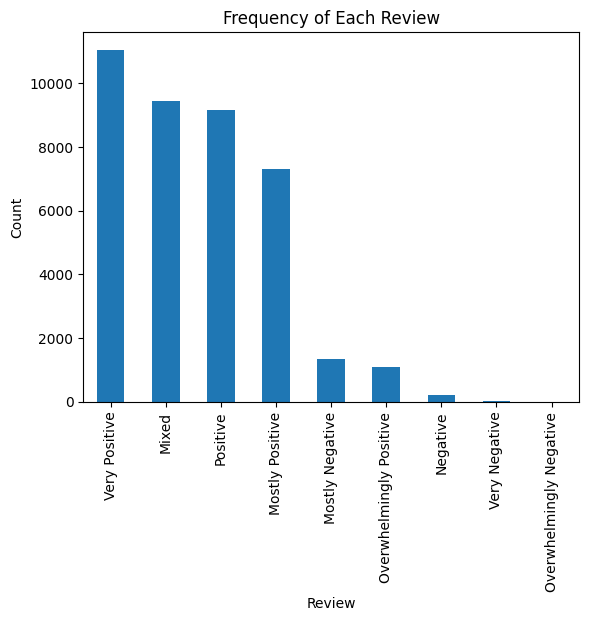

In [34]:
# Count the occurrences of each unique value
value_counts = df['overall_review'].value_counts()

# Plotting the bar chart
value_counts.plot(kind='bar')
plt.xlabel('Review')
plt.ylabel('Count')
plt.title('Frequency of Each Review')
plt.show()

Most reviews are positive, with very few negative reviews.

Text(0.5, 1.0, 'Distribution of overall review %')

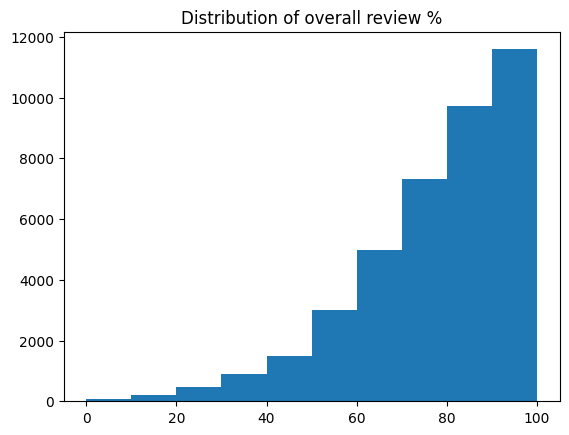

In [35]:
plt.hist(df['overall_review_%'])
plt.title('Distribution of overall review %')

<ipython-input-36-3029d7de49a6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='overall_review', y='overall_review_%', data=df,palette=palette)
<ipython-input-36-3029d7de49a6>:4: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  sns.boxplot(x='overall_review', y='overall_review_%', data=df,palette=palette)


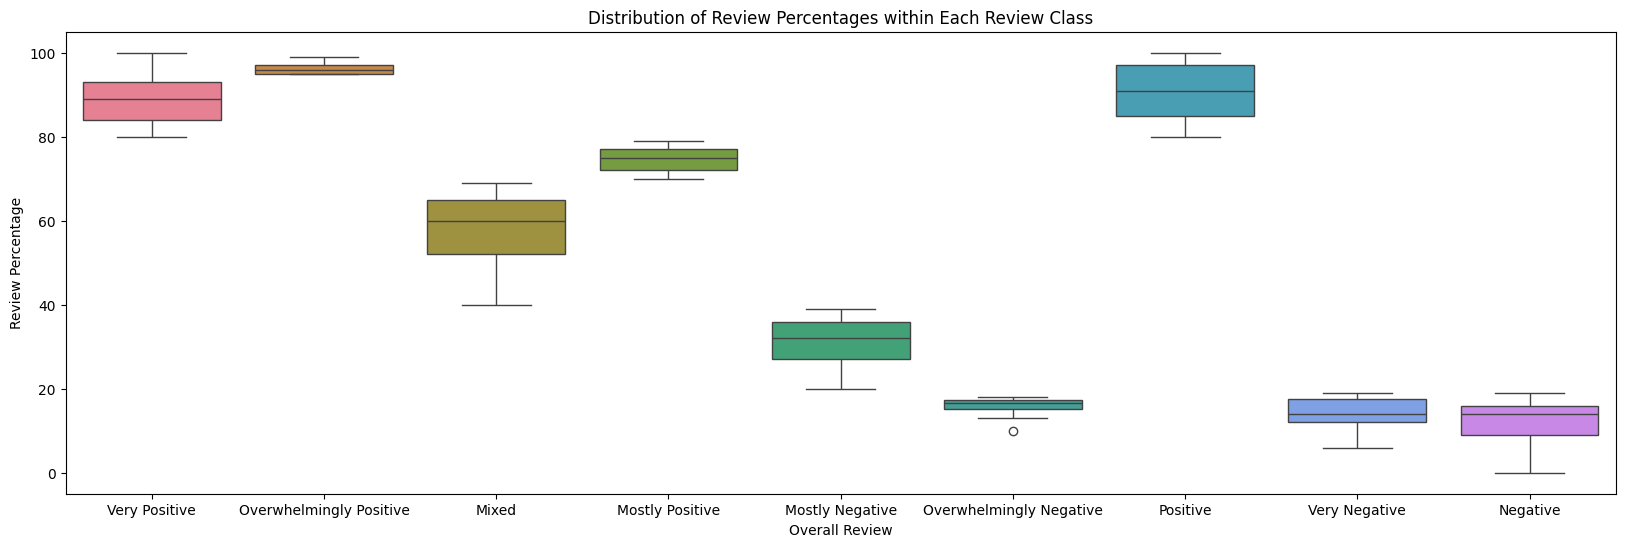

In [36]:
# Plot the distribution of review percentages within each review class
palette = sns.color_palette("husl", len(df['overall_review'].unique()))
plt.figure(figsize=(20, 6))
sns.boxplot(x='overall_review', y='overall_review_%', data=df,palette=palette)
plt.xlabel('Overall Review')
plt.ylabel('Review Percentage')
plt.title('Distribution of Review Percentages within Each Review Class')
plt.show()

In [37]:
df = df.drop(columns = ['release_date', 'categories', 'developer','publisher', 'same_publisher_developer'])

In [38]:
#Calculate the proportion of null values in each column
missing = df.isnull().sum()
missing = missing[missing > 0]
missing_percentage = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing, 'Percentage': missing_percentage})
missing_df

,Missing Values,Percentage
genres,80,0.191022
discounted_price,217,0.518147
about_description,107,0.255492
overall_review,2182,5.210124
overall_review_%,2182,5.210124
overall_review_count,2182,5.210124


There are not a lot of empty rows, so let's drop them.

In [39]:
df_cleaned = df.dropna()
df_cleaned.head(10)

,genres,discounted_price,about_description,awards,overall_review,overall_review_%,overall_review_count,age_of_game,Action,Adventure,Animation & Modeling,Audio Production,Casual,Design & Illustration,Early Access,Education,Free to Play,Game Development,Indie,Massively Multiplayer,Movie,RPG,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing
0,"Action, Free to Play",0.0,"For over two decades, Counter-Strike has offer...",1,Very Positive,87.0,8062218.0,12.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Action, Strategy, Free to Play",0.0,"Every day, millions of players worldwide enter...",0,Very Positive,81.0,2243112.0,11.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,"Action, RPG",3599.0,"THE NEW FANTASY ACTION RPG. Rise, Tarnished, a...",6,Very Positive,93.0,605191.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,"Action, Adventure, Free to Play",0.0,Destiny 2 is an action MMO with a single evolv...,0,Very Positive,80.0,594713.0,5.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,RPG,1499.0,"Cyberpunk 2077 is an open-world, action-advent...",4,Very Positive,83.0,654304.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6,"Adventure, RPG, Strategy",2999.0,"Baldur’s Gate 3 is a story-rich, party-based R...",2,Overwhelmingly Positive,96.0,543077.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
7,"Action, Adventure, Massively Multiplayer, Free...",0.0,Play PUBG: BATTLEGROUNDS for free. Land on str...,1,Mixed,58.0,2361734.0,7.0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
8,"Action, Adventure, Free to Play",0.0,"Apex Legends is the award-winning, free-to-pla...",2,Mostly Positive,77.0,828477.0,4.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9,"Action, Strategy",2249.0,The cataclysmic conclusion to the Total War: W...,0,Mixed,65.0,70065.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10,Action,2499.0,The Galaxy’s Last Line of Offence. Enlist in t...,1,Mostly Positive,73.0,638846.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Train Test Split

In [40]:
from sklearn.model_selection import train_test_split
# Train-test split
train_df, test_df = train_test_split(df_cleaned, test_size=0.2, random_state=42)

In [41]:
# Function to transform overall_review_% into binary classes using median
def transform_to_binary_class(df, column_name, threshold):
    # Create a new column with binary classes based on the threshold
    df['binary_class'] = df[column_name].apply(lambda x: 'positive' if x >= threshold else 'negative')
    return df

threshold = train_df['overall_review_%'].median()
# Apply binary transformation to both training and test datasets
train_df = transform_to_binary_class(train_df, 'overall_review_%', threshold)
test_df = transform_to_binary_class(test_df, 'overall_review_%', threshold)

## Keep only features of interest and the target variable

In [42]:
train_df = train_df.drop(columns = ['overall_review', 'overall_review_%', 'overall_review_count','genres'])
test_df = test_df.drop(columns = ['overall_review', 'overall_review_%', 'overall_review_count','genres'])

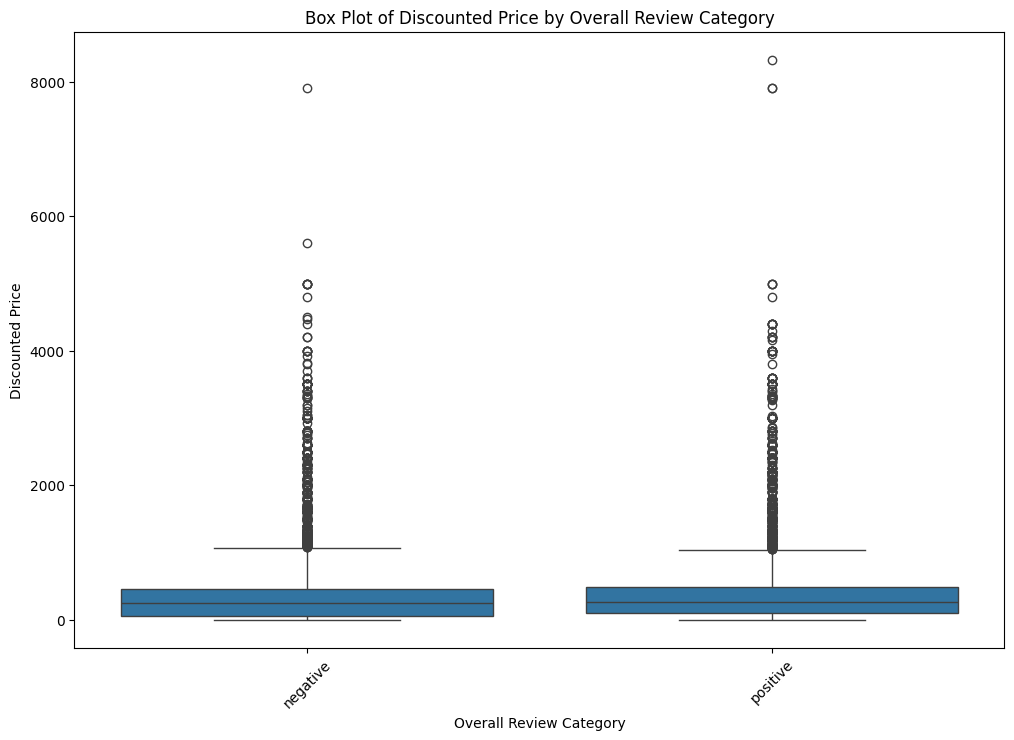

In [43]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='binary_class', y='discounted_price', data=train_df)
plt.title('Box Plot of Discounted Price by Overall Review Category')
plt.xlabel('Overall Review Category')
plt.ylabel('Discounted Price')
plt.xticks(rotation=45)
plt.show()


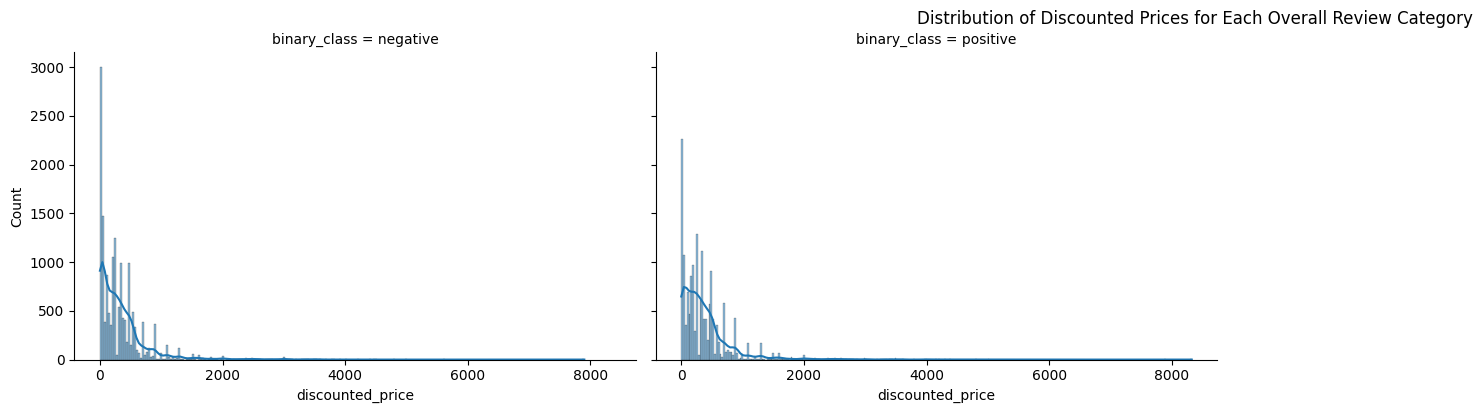

In [44]:
# Facet grid to plot distribution of prices for each review category
g = sns.FacetGrid(train_df, col='binary_class', col_wrap=4, height=4, aspect=1.5)
g.map(sns.histplot, 'discounted_price', kde=True)
g.fig.suptitle('Distribution of Discounted Prices for Each Overall Review Category', y=1.02)
plt.show()


### Data Transformations

In [45]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Prepare numerical features
numerical_features_train = train_df[['discounted_price', 'age_of_game', 'awards']]
numerical_features_test = test_df[['discounted_price', 'age_of_game', 'awards']]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
numerical_scaled_train = scaler.fit_transform(numerical_features_train)

# Transform the test data using the same scaler (do not fit again)
numerical_scaled_test = scaler.transform(numerical_features_test)

# Convert scaled numerical features back to DataFrame with original column names
numerical_scaled_train_df = pd.DataFrame(numerical_scaled_train, columns=numerical_features_train.columns, index=numerical_features_train.index)
numerical_scaled_test_df = pd.DataFrame(numerical_scaled_test, columns=numerical_features_test.columns, index=numerical_features_test.index)

# Select genre features
genre_features_train = train_df.iloc[:, 4:-2] # Genre columns for train
genre_features_test = test_df.iloc[:, 4:-2] # Genre columns for test

# Select text features
text_features_train = train_df['about_description']
text_features_test = test_df['about_description']

# Create TF-IDF embeddings for text data
tfidf_vectorizer = TfidfVectorizer(max_features=500)

# Fit the vectorizer on the training data and transform the training data
text_embeddings_train = tfidf_vectorizer.fit_transform(text_features_train).toarray()

# Transform the test data using the same vectorizer (do not fit again)
text_embeddings_test = tfidf_vectorizer.transform(text_features_test).toarray()

# Convert the TF-IDF embeddings to DataFrame, ensuring the number of columns is correct
text_embeddings_train_df = pd.DataFrame(text_embeddings_train, index=text_features_train.index, columns=[f'tfidf_{i}' for i in range(text_embeddings_train.shape[1])])
text_embeddings_test_df = pd.DataFrame(text_embeddings_test, index=text_features_test.index, columns=[f'tfidf_{i}' for i in range(text_embeddings_test.shape[1])])

# Encode the binary class as 0 and 1
label_encoder = LabelEncoder()
train_df['binary_class_encoded'] = label_encoder.fit_transform(train_df['binary_class'])
test_df['binary_class_encoded'] = label_encoder.transform(test_df['binary_class'])

# Prepare the final input features by concatenating all
X_train = pd.concat([numerical_scaled_train_df, genre_features_train,text_features_train, text_embeddings_train_df], axis=1)
y_train = train_df['binary_class_encoded']

X_test = pd.concat([numerical_scaled_test_df, genre_features_test, text_features_test, text_embeddings_test_df], axis=1)
y_test = test_df['binary_class_encoded']


In [47]:
shapes_info = {
    "X_train": X_train.shape,
    "y_train": y_train.shape,
    "X_test": X_test.shape,
    "y_test": y_test.shape,
}

shapes_info

{'X_train': (31544, 525),
 'y_train': (31544,),
 'X_test': (7887, 525),
 'y_test': (7887,)}

In [48]:
X_train.head(2)

,discounted_price,age_of_game,awards,Action,Adventure,Animation & Modeling,Audio Production,Casual,Design & Illustration,Early Access,Education,Free to Play,Game Development,Indie,Massively Multiplayer,Movie,RPG,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,about_description,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,tfidf_9,tfidf_10,tfidf_11,tfidf_12,tfidf_13,tfidf_14,tfidf_15,tfidf_16,tfidf_17,tfidf_18,tfidf_19,tfidf_20,tfidf_21,tfidf_22,tfidf_23,tfidf_24,tfidf_25,tfidf_26,tfidf_27,tfidf_28,tfidf_29,tfidf_30,tfidf_31,tfidf_32,tfidf_33,tfidf_34,tfidf_35,tfidf_36,tfidf_37,tfidf_38,tfidf_39,tfidf_40,tfidf_41,tfidf_42,tfidf_43,tfidf_44,tfidf_45,tfidf_46,tfidf_47,tfidf_48,tfidf_49,tfidf_50,tfidf_51,tfidf_52,tfidf_53,tfidf_54,tfidf_55,tfidf_56,tfidf_57,tfidf_58,tfidf_59,tfidf_60,tfidf_61,tfidf_62,tfidf_63,tfidf_64,tfidf_65,tfidf_66,tfidf_67,tfidf_68,tfidf_69,tfidf_70,tfidf_71,tfidf_72,tfidf_73,tfidf_74,tfidf_75,tfidf_76,tfidf_77,tfidf_78,tfidf_79,tfidf_80,tfidf_81,tfidf_82,tfidf_83,tfidf_84,tfidf_85,tfidf_86,tfidf_87,tfidf_88,tfidf_89,tfidf_90,tfidf_91,tfidf_92,tfidf_93,tfidf_94,tfidf_95,tfidf_96,tfidf_97,tfidf_98,tfidf_99,tfidf_100,tfidf_101,tfidf_102,tfidf_103,tfidf_104,tfidf_105,tfidf_106,tfidf_107,tfidf_108,tfidf_109,tfidf_110,tfidf_111,tfidf_112,tfidf_113,tfidf_114,tfidf_115,tfidf_116,tfidf_117,tfidf_118,tfidf_119,tfidf_120,tfidf_121,tfidf_122,tfidf_123,tfidf_124,tfidf_125,tfidf_126,tfidf_127,tfidf_128,tfidf_129,tfidf_130,tfidf_131,tfidf_132,tfidf_133,tfidf_134,tfidf_135,tfidf_136,tfidf_137,tfidf_138,tfidf_139,tfidf_140,tfidf_141,tfidf_142,tfidf_143,tfidf_144,tfidf_145,tfidf_146,tfidf_147,tfidf_148,tfidf_149,tfidf_150,tfidf_151,tfidf_152,tfidf_153,tfidf_154,tfidf_155,tfidf_156,tfidf_157,tfidf_158,tfidf_159,tfidf_160,tfidf_161,tfidf_162,tfidf_163,tfidf_164,tfidf_165,tfidf_166,tfidf_167,tfidf_168,tfidf_169,tfidf_170,tfidf_171,tfidf_172,tfidf_173,tfidf_174,tfidf_175,tfidf_176,tfidf_177,tfidf_178,tfidf_179,tfidf_180,tfidf_181,tfidf_182,tfidf_183,tfidf_184,tfidf_185,tfidf_186,tfidf_187,tfidf_188,tfidf_189,tfidf_190,tfidf_191,tfidf_192,tfidf_193,tfidf_194,tfidf_195,tfidf_196,tfidf_197,tfidf_198,tfidf_199,tfidf_200,tfidf_201,tfidf_202,tfidf_203,tfidf_204,tfidf_205,tfidf_206,tfidf_207,tfidf_208,tfidf_209,tfidf_210,tfidf_211,tfidf_212,tfidf_213,tfidf_214,tfidf_215,tfidf_216,tfidf_217,tfidf_218,tfidf_219,tfidf_220,tfidf_221,tfidf_222,tfidf_223,tfidf_224,tfidf_225,tfidf_226,tfidf_227,tfidf_228,tfidf_229,tfidf_230,tfidf_231,tfidf_232,tfidf_233,tfidf_234,tfidf_235,tfidf_236,tfidf_237,tfidf_238,tfidf_239,tfidf_240,tfidf_241,tfidf_242,tfidf_243,tfidf_244,tfidf_245,tfidf_246,tfidf_247,tfidf_248,tfidf_249,tfidf_250,tfidf_251,tfidf_252,tfidf_253,tfidf_254,tfidf_255,tfidf_256,tfidf_257,tfidf_258,tfidf_259,tfidf_260,tfidf_261,tfidf_262,tfidf_263,tfidf_264,tfidf_265,tfidf_266,tfidf_267,tfidf_268,tfidf_269,tfidf_270,tfidf_271,tfidf_272,tfidf_273,tfidf_274,tfidf_275,tfidf_276,tfidf_277,tfidf_278,tfidf_279,tfidf_280,tfidf_281,tfidf_282,tfidf_283,tfidf_284,tfidf_285,tfidf_286,tfidf_287,tfidf_288,tfidf_289,tfidf_290,tfidf_291,tfidf_292,tfidf_293,tfidf_294,tfidf_295,tfidf_296,tfidf_297,tfidf_298,tfidf_299,tfidf_300,tfidf_301,tfidf_302,tfidf_303,tfidf_304,tfidf_305,tfidf_306,tfidf_307,tfidf_308,tfidf_309,tfidf_310,tfidf_311,tfidf_312,tfidf_313,tfidf_314,tfidf_315,tfidf_316,tfidf_317,tfidf_318,tfidf_319,tfidf_320,tfidf_321,tfidf_322,tfidf_323,tfidf_324,tfidf_325,tfidf_326,tfidf_327,tfidf_328,tfidf_329,tfidf_330,tfidf_331,tfidf_332,tfidf_333,tfidf_334,tfidf_335,tfidf_336,tfidf_337,tfidf_338,tfidf_339,tfidf_340,tfidf_341,tfidf_342,tfidf_343,tfidf_344,tfidf_345,tfidf_346,tfidf_347,tfidf_348,tfidf_349,tfidf_350,tfidf_351,tfidf_352,tfidf_353,tfidf_354,tfidf_355,tfidf_356,tfidf_357,tfidf_358,tfidf_359,tfidf_360,tfidf_361,tfidf_362,tfidf_363,tfidf_364,tfidf_365,tfidf_366,tfidf_367,tfidf_368,tfidf_369,tfidf_370,tfidf_371,tfidf_372,tfidf_373,tfidf_374,tfidf_375,tfidf_376,tfidf_377,tfidf_378,tfidf_379,t

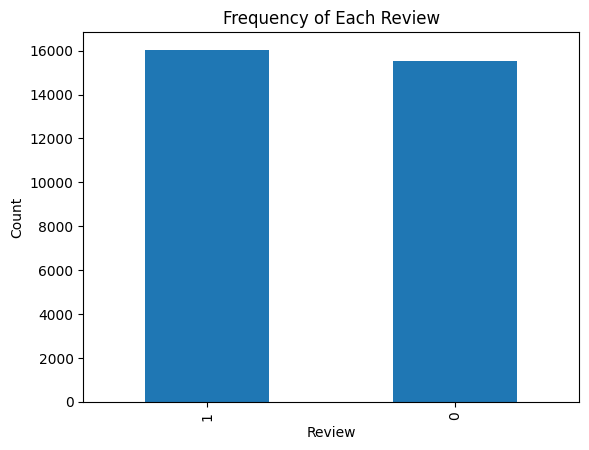

In [49]:
# Count the occurrences of each unique value
value_counts = y_train.value_counts()

# Plotting the bar chart
value_counts.plot(kind='bar')
plt.xlabel('Review')
plt.ylabel('Count')
plt.title('Frequency of Each Review')
plt.show()

### Split Training into Training and Validation Sets

In [50]:
# Split the training data further into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


In [51]:
shapes_info = {
    "X_train": X_train.shape,
    "y_train": y_train.shape,
    "X_val": X_val.shape,
    "y_val": y_val.shape,
    "X_test": X_test.shape,
    "y_test": y_test.shape,
}

shapes_info

{'X_train': (23658, 525),
 'y_train': (23658,),
 'X_val': (7886, 525),
 'y_val': (7886,),
 'X_test': (7887, 525),
 'y_test': (7887,)}

## Logistic Regression

## Baseline Model: Logistic Regression with Price

Logistic Regression with output variable binary class and input feature as the discounted price

In [52]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# standard libraries
import pandas as pd
import numpy as np
import os
import random

# visualizations
import matplotlib.pyplot as plt
from IPython.display import Image
from mlxtend.plotting import heatmap
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

# sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# tf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import initializers

random.seed(2)

In [53]:
def logistic_model(num_features):
    """Return a simple logistic regression model using the Keras Sequential API."""
  # Clear session and set a random seed for consistent behavior.
    tf.keras.backend.clear_session()
    tf.random.set_seed(1234)


  # Use Keras Sequential API to build a logistic regression
    model = keras.Sequential()

    # create input layer
    model.add(tf.keras.Input(shape=(num_features,),
         name='Input'
    ))


    model.add(keras.layers.Dense(
        units=1,
        use_bias=True,
        activation='sigmoid',
        #kernel_initializer='random_normal',
        #bias_initializer='zeros',
        kernel_initializer=initializers.RandomNormal(stddev=0.01),
        bias_initializer=initializers.RandomNormal(stddev=0.01),
        name="Output"
    ))

  # Use Binary Crossentropy as our loss and the SGD optimizer.
    model.compile(
        loss=tf.keras.losses.BinaryCrossentropy(),
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
        metrics=[tf.keras.metrics.BinaryAccuracy()]
    )
    return model


In [54]:
# Prepare the target and feature
# Build a model
features = ['discounted_price']
model = logistic_model(num_features=len(features))
model.summary()

X_train_price = X_train[['discounted_price']]
X_val_price = X_val[['discounted_price']]
X_test_price = X_test[['discounted_price']]

tf.random.set_seed(1234)
np.random.seed(1234)

# Train model
hist= model.fit(x=X_train[['discounted_price']],
                y=y_train,
                validation_data=[X_val[['discounted_price']], y_val],
                batch_size=len(X_train),
                epochs=20,
                verbose=1 #silence fit
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Output (Dense)                       │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - binary_accuracy: 0.5243 - loss: 0.6931 - val_binary_accuracy: 0.5339 - val_loss: 0.6930
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - binary_accuracy: 0.5313 - loss: 0.6931 - val_binary_accuracy: 0.5335 - val_loss: 0.6930
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - binary_accuracy: 0.5310 - loss: 0.6930 - val_binary_accuracy: 0.5335 - val_loss: 0.6929
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - binary_accuracy: 0.5335 - loss: 0.6930 - val_binary_accuracy: 0.5337 - val_loss: 0.6929
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - binary_accuracy: 0.5339 - loss: 0.6929 - val_binary_accuracy: 0.5344 - val_loss: 0.6928
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - binary_accuracy: 0.5344 - loss: 0.6929 - val_binary_accuracy: 0.5344 - val_loss: 0.6928
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - binary_accuracy: 0.5346 - loss: 0.6928 - val_binary_accuracy: 0.5345 - val_loss: 0.6927
Epoch 8/20
1/1 ━━━━━━━━━━━━━━

Baseline model using only price as the feature
Final Training Accuracy: 53.48%
Final Validation Accuracy: 53.42%


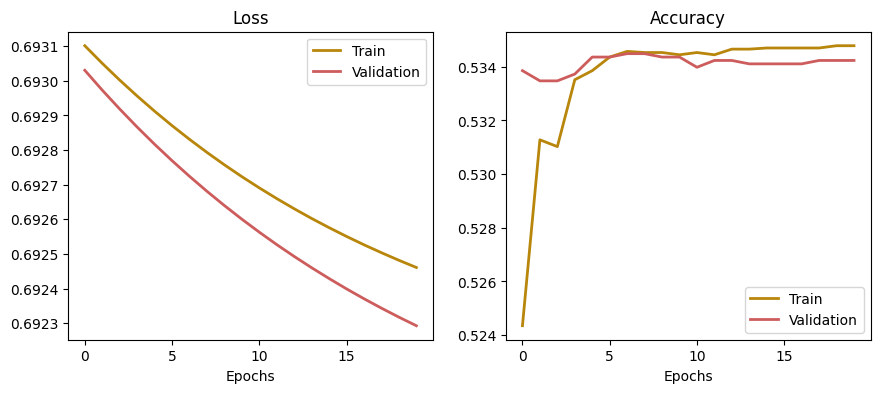

In [55]:
# grab history
history = hist.history

# plot loss for train and validation
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=2, color='darkgoldenrod')
plt.plot(history['val_loss'], lw=2, color='indianred')
plt.legend(['Train', 'Validation'], fontsize=10)
ax.set_xlabel('Epochs', size=10)
ax.set_title('Loss');

# plot accuracy for train and validation
ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=2, color='darkgoldenrod')
plt.plot(history['val_binary_accuracy'], lw=2, color='indianred')
plt.legend(['Train', 'Validation'], fontsize=10)
ax.set_xlabel('Epochs', size=10)
ax.set_title('Accuracy');

# Get the last epoch's training and validation accuracy
final_train_accuracy = history['binary_accuracy'][-1]
final_val_accuracy = history['val_binary_accuracy'][-1]
print("Baseline model using only price as the feature")
print(f"Final Training Accuracy: {final_train_accuracy*100:.2f}%")
print(f"Final Validation Accuracy: {final_val_accuracy*100:.2f}%")

## Other logistic regression models

## Model 2: Logistic Regression with Price and Age of Game

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Output (Dense)                       │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 948ms/step - binary_accuracy: 0.5672 - loss: 0.6927 - val_binary_accuracy: 0.5642 - val_loss: 0.6923
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step - binary_accuracy: 0.5710 - loss: 0.6922 - val_binary_accuracy: 0.5668 - val_loss: 0.6919
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - binary_accuracy: 0.5794 - loss: 0.6918 - val_binary_accuracy: 0.5666 - val_loss: 0.6915
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - binary_accuracy: 0.5797 - loss: 0.6914 - val_binary_accuracy: 0.5678 - val_loss: 0.6911
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - binary_accuracy: 0.5787 - loss: 0.6911 - val_binary_accuracy: 0.5689 - val_loss: 0.6908
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - binary_accuracy: 0.5786 - loss: 0.6907 - val_binary_accuracy: 0.5685 - val_loss: 0.6905
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - binary_accuracy: 0.5771 - loss: 0.6904 - val_binary_accuracy: 0.5678 - val_loss: 0.6902
Epoch 8/20
1/1 ━━━━━━━━━━

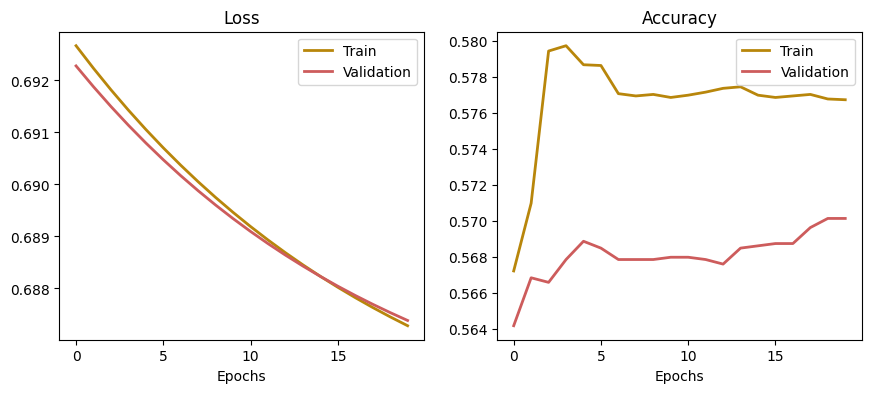

In [56]:
# Prepare the target and feature
# Build a model
features = ['discounted_price','age_of_game']
model = logistic_model(num_features=len(features))
model.summary()

# Model 2: Logistic regression using price and age
X_train_price_age = pd.concat([X_train_price, X_train['age_of_game']], axis=1)
X_val_price_age = pd.concat([X_val_price, X_val['age_of_game']], axis=1)
X_test_price_age = pd.concat([X_test_price, X_test['age_of_game']], axis=1)

tf.random.set_seed(1234)
np.random.seed(1234)

# Train model
hist= model.fit(x=X_train_price_age,
                y=y_train,
                validation_data=[X_val_price_age, y_val],
                batch_size=len(X_train),
                epochs=20,
                verbose=1 #silence fit
)

# grab history
history = hist.history

# plot loss for train and validation
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=2, color='darkgoldenrod')
plt.plot(history['val_loss'], lw=2, color='indianred')
plt.legend(['Train', 'Validation'], fontsize=10)
ax.set_xlabel('Epochs', size=10)
ax.set_title('Loss');

# plot accuracy for train and validation
ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=2, color='darkgoldenrod')
plt.plot(history['val_binary_accuracy'], lw=2, color='indianred')
plt.legend(['Train', 'Validation'], fontsize=10)
ax.set_xlabel('Epochs', size=10)
ax.set_title('Accuracy');

# Get the last epoch's training and validation accuracy
final_train_accuracy = history['binary_accuracy'][-1]
final_val_accuracy = history['val_binary_accuracy'][-1]
print("Logistic model using price and age as the feature")
print(f"Final Training Accuracy: {final_train_accuracy*100:.2f}%")
print(f"Final Validation Accuracy: {final_val_accuracy*100:.2f}%")

## Model 3: Logistic Regression with Price, Age of Game, Genres

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Output (Dense)                       │ (None, 1)                   │              24 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24 (96.00 B)

 Trainable params: 24 (96.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - binary_accuracy: 0.5205 - loss: 0.6928 - val_binary_accuracy: 0.5479 - val_loss: 0.6922
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - binary_accuracy: 0.5473 - loss: 0.6922 - val_binary_accuracy: 0.5656 - val_loss: 0.6916
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - binary_accuracy: 0.5618 - loss: 0.6916 - val_binary_accuracy: 0.5703 - val_loss: 0.6911
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - binary_accuracy: 0.5708 - loss: 0.6911 - val_binary_accuracy: 0.5757 - val_loss: 0.6906
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - binary_accuracy: 0.5802 - loss: 0.6906 - val_binary_accuracy: 0.5762 - val_loss: 0.6901
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - binary_accuracy: 0.5835 - loss: 0.6901 - val_binary_accuracy: 0.5798 - val_loss: 0.6896
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - binary_accuracy: 0.5851 - loss: 0.6896 - val_binary_accuracy: 0.5831 - val_loss: 0.6892
Epoch 8/20
1/1 ━━━━━━━━━━━

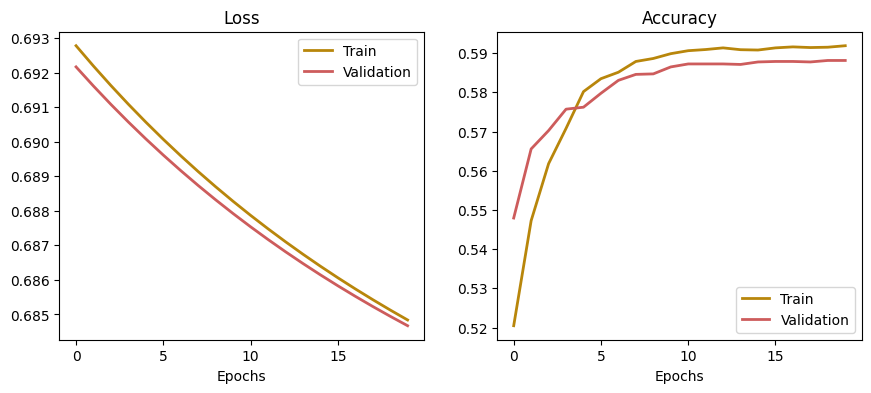

In [57]:
# Prepare the target and feature
# Model 3: Logistic regression using price, genres, age
X_train_price_age_genres = pd.concat([X_train_price_age, X_train.iloc[:, 3:24]], axis=1)
X_val_price_age_genres = pd.concat([X_val_price_age, X_val.iloc[:, 3:24]], axis=1)
X_test_price_age_genres = pd.concat([X_test_price_age, X_test.iloc[:, 3:24]], axis=1)

# Build a model
model = logistic_model(num_features=X_train_price_age_genres.shape[1])
model.summary()

tf.random.set_seed(1234)
np.random.seed(1234)

# Train model
hist= model.fit(x=X_train_price_age_genres,
                y=y_train,
                validation_data=[X_val_price_age_genres, y_val],
                batch_size=len(X_train),
                epochs=20,
                verbose=1 #silence fit
)

# grab history
history = hist.history

# plot loss for train and validation
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=2, color='darkgoldenrod')
plt.plot(history['val_loss'], lw=2, color='indianred')
plt.legend(['Train', 'Validation'], fontsize=10)
ax.set_xlabel('Epochs', size=10)
ax.set_title('Loss');

# plot accuracy for train and validation
ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=2, color='darkgoldenrod')
plt.plot(history['val_binary_accuracy'], lw=2, color='indianred')
plt.legend(['Train', 'Validation'], fontsize=10)
ax.set_xlabel('Epochs', size=10)
ax.set_title('Accuracy');

# Get the last epoch's training and validation accuracy
final_train_accuracy = history['binary_accuracy'][-1]
final_val_accuracy = history['val_binary_accuracy'][-1]
print("Logistic model using price, age and genres as the feature")
print(f"Final Training Accuracy: {final_train_accuracy*100:.2f}%")
print(f"Final Validation Accuracy: {final_val_accuracy*100:.2f}%")

## Model 4: Logistic Regression with Price, Age of Game, Genres, Awards

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Output (Dense)                       │ (None, 1)                   │              25 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25 (100.00 B)

 Trainable params: 25 (100.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 927ms/step - binary_accuracy: 0.5034 - loss: 0.6937 - val_binary_accuracy: 0.5063 - val_loss: 0.6932
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - binary_accuracy: 0.5091 - loss: 0.6929 - val_binary_accuracy: 0.5155 - val_loss: 0.6925
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - binary_accuracy: 0.5147 - loss: 0.6922 - val_binary_accuracy: 0.5205 - val_loss: 0.6918
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - binary_accuracy: 0.5233 - loss: 0.6915 - val_binary_accuracy: 0.5303 - val_loss: 0.6911
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - binary_accuracy: 0.5347 - loss: 0.6908 - val_binary_accuracy: 0.5391 - val_loss: 0.6904
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - binary_accuracy: 0.5468 - loss: 0.6902 - val_binary_accuracy: 0.5467 - val_loss: 0.6898
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - binary_accuracy: 0.5561 - loss: 0.6896 - val_binary_accuracy: 0.5554 - val_loss: 0.6892
Epoch 8/20
1/1 ━━━━━━━━━━━

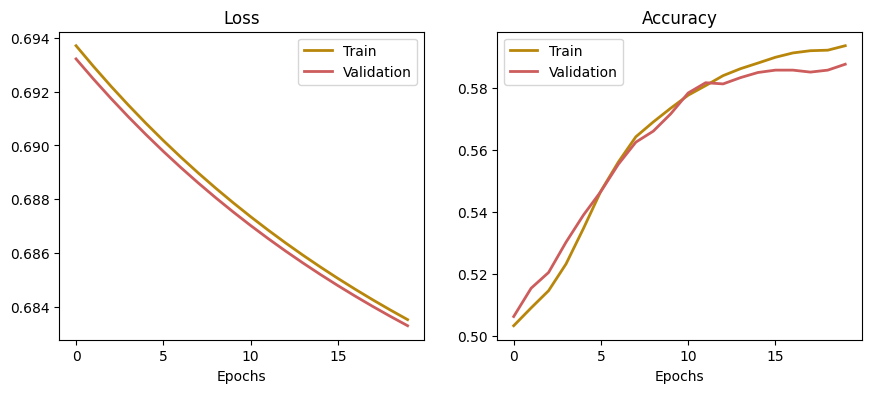

In [58]:
# Model 4: Logistic regression using price, age, genres, and awards
X_train_price_age_genres_awards = pd.concat([X_train_price_age_genres, X_train['awards']], axis=1)
X_val_price_age_genres_awards = pd.concat([X_val_price_age_genres, X_val['awards']], axis=1)
X_test_price_age_genres_awards = pd.concat([X_test_price_age_genres, X_test['awards']], axis=1)

# Build a model
model = logistic_model(num_features=X_train_price_age_genres_awards.shape[1])
model.summary()

tf.random.set_seed(1234)
np.random.seed(1234)

# Train model
hist= model.fit(x=X_train_price_age_genres_awards,
                y=y_train,
                validation_data=[X_val_price_age_genres_awards, y_val],
                batch_size=len(X_train),
                epochs=20,
                verbose=1 #silence fit
)

# grab history
history = hist.history

# plot loss for train and validation
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=2, color='darkgoldenrod')
plt.plot(history['val_loss'], lw=2, color='indianred')
plt.legend(['Train', 'Validation'], fontsize=10)
ax.set_xlabel('Epochs', size=10)
ax.set_title('Loss');

# plot accuracy for train and validation
ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=2, color='darkgoldenrod')
plt.plot(history['val_binary_accuracy'], lw=2, color='indianred')
plt.legend(['Train', 'Validation'], fontsize=10)
ax.set_xlabel('Epochs', size=10)
ax.set_title('Accuracy');

# Get the last epoch's training and validation accuracy
final_train_accuracy = history['binary_accuracy'][-1]
final_val_accuracy = history['val_binary_accuracy'][-1]
print("Logistic model using price, age, genres and awards as the feature")
print(f"Final Training Accuracy: {final_train_accuracy*100:.2f}%")
print(f"Final Validation Accuracy: {final_val_accuracy*100:.2f}%")

## Model 5: Logistic Regression with Price, Age of Game, Awards, Genres, TFIDF Embeddings on Description

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Output (Dense)                       │ (None, 1)                   │             525 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 525 (2.05 KB)

 Trainable params: 525 (2.05 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - binary_accuracy: 0.4853 - loss: 0.6934 - val_binary_accuracy: 0.5164 - val_loss: 0.6923
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - binary_accuracy: 0.5144 - loss: 0.6926 - val_binary_accuracy: 0.5421 - val_loss: 0.6916
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - binary_accuracy: 0.5357 - loss: 0.6919 - val_binary_accuracy: 0.5637 - val_loss: 0.6909
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - binary_accuracy: 0.5547 - loss: 0.6911 - val_binary_accuracy: 0.5766 - val_loss: 0.6902
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - binary_accuracy: 0.5737 - loss: 0.6904 - val_binary_accuracy: 0.5871 - val_loss: 0.6895
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - binary_accuracy: 0.5836 - loss: 0.6898 - val_binary_accuracy: 0.5921 - val_loss: 0.6889
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - binary_accuracy: 0.5889 - loss: 0.6891 - val_binary_accuracy: 0.5950 - val_loss: 0.6883
Epoch 8/20
1/1 ━━━━━━━━━

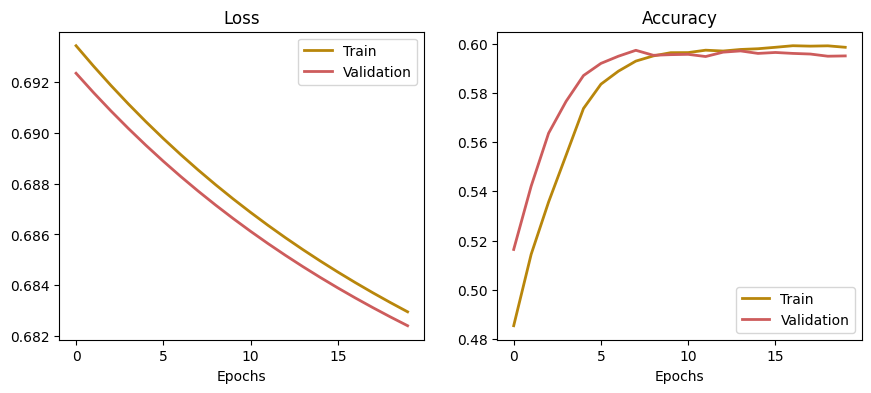

In [59]:
# Model 5: Logistic regression using price, age, genres, awards, TFIDF embeddings
X_train_price_age_genres_awards_TFIDF = pd.concat([X_train_price_age_genres_awards, X_train.iloc[:, 25:]], axis=1)
X_val_price_age_genres_awards_TFIDF = pd.concat([X_val_price_age_genres_awards, X_val.iloc[:, 25:]], axis=1)

# Build a model
model = logistic_model(num_features=X_train_price_age_genres_awards_TFIDF.shape[1])
model.summary()

tf.random.set_seed(1234)
np.random.seed(1234)

# Train model
hist= model.fit(x=X_train_price_age_genres_awards_TFIDF,
                y=y_train,
                validation_data=[X_val_price_age_genres_awards_TFIDF, y_val],
                batch_size=len(X_train),
                epochs=20,
                verbose=1 #silence fit
)

# grab history
history = hist.history

# plot loss for train and validation
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=2, color='darkgoldenrod')
plt.plot(history['val_loss'], lw=2, color='indianred')
plt.legend(['Train', 'Validation'], fontsize=10)
ax.set_xlabel('Epochs', size=10)
ax.set_title('Loss');

# plot accuracy for train and validation
ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=2, color='darkgoldenrod')
plt.plot(history['val_binary_accuracy'], lw=2, color='indianred')
plt.legend(['Train', 'Validation'], fontsize=10)
ax.set_xlabel('Epochs', size=10)
ax.set_title('Accuracy');

# Get the last epoch's training and validation accuracy
final_train_accuracy = history['binary_accuracy'][-1]
final_val_accuracy = history['val_binary_accuracy'][-1]
print("Logistic model using price, age, genres, awards, TFIDF vectors as the feature")
print(f"Final Training Accuracy: {final_train_accuracy*100:.2f}%")
print(f"Final Validation Accuracy: {final_val_accuracy*100:.2f}%")

## Model 6: Logistic Regression with Price, Age, Genres, Awards, Learned Embeddings

### Learned Embeddings

In [60]:
X_train['about_description'].iloc[0]

"Dark Maidens is a side scrolling action game where you fight through hordes of enemies to test your metal against the strongest of foes. It has an advanced combat system in which you can light attack, heavy attack, block, fake out, and dodge. Don't expect an easy win as the enemies fight back!"

In [61]:
len(X_train['about_description'].iloc[0])

294

####  Process the text to remove the stop words, convert to lowercase and remove punctuation.Tokenize all words in the about description columns, reduce the vocab to the 5000 most important tokens, words beyond this will be the OOV token.

In [62]:
from tensorflow.keras.preprocessing.text import Tokenizer
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Download stopwords from nltk
nltk.download('stopwords')

# Get the English stop words
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove stop words
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Apply preprocessing
X_train['about_description'] = X_train['about_description'].apply(preprocess_text)

# Initialize the Tokenizer with num_words=5000
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')

# Fit the tokenizer on the text column
tokenizer.fit_on_texts(X_train['about_description'])

# Convert text to integer sequences, only top 5000 words are kept
X_train['tokenized_text'] = tokenizer.texts_to_sequences(X_train['about_description'])

# Get the word index for reference
word_index = tokenizer.word_index

print("\nWord Index:")
# Show only top 20 words for brevity
for word, index in list(word_index.items())[:20]:
    print(f'{word}: {index}')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



Word Index:
<OOV>: 1
game: 2
world: 3
new: 4
adventure: 5
play: 6
find: 7
way: 8
explore: 9
experience: 10
action: 11
take: 12
one: 13
fight: 14
time: 15
players: 16
puzzle: 17
story: 18
get: 19
unique: 20


In [63]:
(X_train['about_description'].iloc[0])

'dark maidens side scrolling action game fight hordes enemies test metal strongest foes advanced combat system light attack heavy attack block fake dodge dont expect easy win enemies fight back'

In [64]:
word_index['dark']

58

In [65]:
(X_train['tokenized_text'].iloc[0])

[58,
 1,
 451,
 1695,
 11,
 2,
 14,
 210,
 24,
 250,
 1120,
 2775,
 644,
 775,
 44,
 137,
 296,
 393,
 1048,
 393,
 1148,
 4778,
 558,
 177,
 2425,
 309,
 317,
 24,
 14,
 52]

#### Tokenized About Description Lengths

Positive reviews 
min:  1 
max:  41 
mean:  19.906418666445237

Negative reviews 
min:  1 
max:  42 
mean:  20.47404218682738


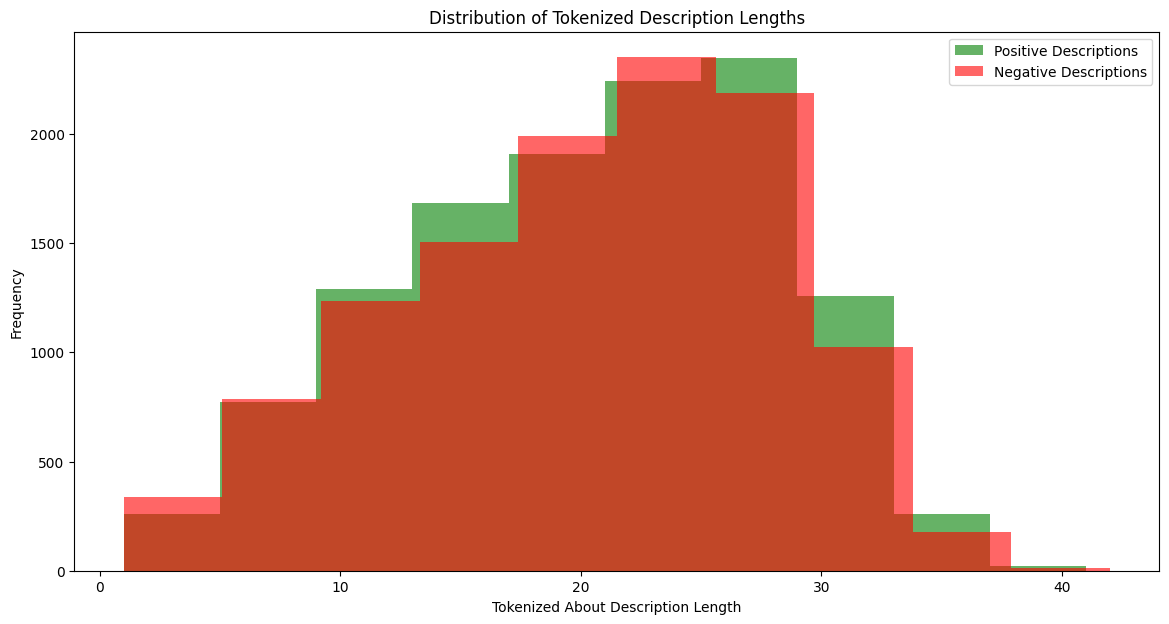

In [66]:
positive_description_lengths = [len(about_description) for about_description, binary_class_encoded in zip(X_train['tokenized_text'], y_train) if binary_class_encoded == 1]
negative_description_lengths = [len(about_description) for about_description, binary_class_encoded in zip(X_train['tokenized_text'], y_train) if binary_class_encoded == 0]

positive_min_length = np.min(positive_description_lengths)
positive_max_length = np.max(positive_description_lengths)
positive_mean_length = np.mean(positive_description_lengths)

negative_min_length = np.min(negative_description_lengths)
negative_max_length = np.max(negative_description_lengths)
negative_mean_length = np.mean(negative_description_lengths)

print("Positive reviews", "\nmin: ",positive_min_length, "\nmax: ",positive_max_length, "\nmean: ",positive_mean_length)
print("\nNegative reviews", "\nmin: ",negative_min_length, "\nmax: ",negative_max_length, "\nmean: ",negative_mean_length)

plt.figure(figsize=(14, 7))
plt.hist(positive_description_lengths, bins=10, alpha=0.6, color='g', label='Positive Descriptions')
plt.hist(negative_description_lengths, bins=10, alpha=0.6, color='r', label='Negative Descriptions')
plt.title('Distribution of Tokenized Description Lengths')
plt.xlabel('Tokenized About Description Length')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

#### Make all descriptions the same length by adding special padding, truncate all inputs to a specific length of 35 tokens

In [67]:
def truncate_pad_data(sequences, max_length):
    padded_data = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post', value=0)
    return padded_data

#Truncate and pad the training data
padded_data = truncate_pad_data(X_train['tokenized_text'], max_length=35)

# Convert the padded data to a list of lists before assigning it to a column
X_train['padded_text'] = list(padded_data)

# Check the padded output.
print('Length of X_train[tokenized_text].iloc[0]:', len(X_train['tokenized_text'].iloc[0]))
print('Length of X_train[padded_text].iloc[0]:', len(X_train['padded_text'].iloc[0]))
print('About description:', X_train['tokenized_text'].iloc[0])
print('Padded text:', X_train['padded_text'].iloc[0])

Length of X_train[tokenized_text].iloc[0]: 30
Length of X_train[padded_text].iloc[0]: 35
About description: [58, 1, 451, 1695, 11, 2, 14, 210, 24, 250, 1120, 2775, 644, 775, 44, 137, 296, 393, 1048, 393, 1148, 4778, 558, 177, 2425, 309, 317, 24, 14, 52]
Padded text: [  58    1  451 1695   11    2   14  210   24  250 1120 2775  644  775
   44  137  296  393 1048  393 1148 4778  558  177 2425  309  317   24
   14   52    0    0    0    0    0]


## functions to process the about description column

In [68]:
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Download stopwords from nltk
nltk.download('stopwords')

# Get the English stop words
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text, stop_words):
    """
    Preprocesses a given text by lowercasing, removing punctuation, and removing stopwords.

    Parameters:
    text (str): The text to be processed.
    stop_words (set): A set of stopwords to remove from the text.

    Returns:
    str: The preprocessed text.
    """
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove stop words
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

def preprocess_dataframe(df, text_column, stop_words):
    """
    Applies preprocessing to a specified text column in a DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the text column to preprocess.
    text_column (str): The name of the text column to preprocess.
    stop_words (set): A set of stopwords to remove from the text.

    Returns:
    pd.DataFrame: A DataFrame with the preprocessed text.
    """
    df[text_column] = df[text_column].apply(lambda x: preprocess_text(x, stop_words))
    return df

def tokenize_text(df, text_column, num_words=5000, oov_token='<OOV>'):
    """
    Tokenizes the text data in a specified column of a DataFrame and limits the vocabulary size.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the text column to tokenize.
    text_column (str): The name of the text column to tokenize.
    num_words (int): The maximum number of words to keep in the vocabulary.
    oov_token (str): The token to use for out-of-vocabulary words.

    Returns:
    pd.DataFrame: The DataFrame with an additional column for tokenized sequences.
    Tokenizer: The fitted Keras tokenizer instance.
    """
    tokenizer = Tokenizer(num_words=num_words, oov_token=oov_token)
    tokenizer.fit_on_texts(df[text_column])
    df['tokenized_text'] = tokenizer.texts_to_sequences(df[text_column])
    return df, tokenizer

def truncate_pad_data(sequences, max_length):
    """
    Pads and truncates sequences to a specified maximum length.

    Parameters:
    sequences (list of list of int): The tokenized text sequences to pad/truncate.
    max_length (int): The maximum length for the sequences.

    Returns:
    np.ndarray: The padded/truncated sequences as a NumPy array.
    """
    padded_data = tf.keras.preprocessing.sequence.pad_sequences(
        sequences, maxlen=max_length, padding='post', truncating='post', value=0)
    return padded_data

def process_datasets(X_train, X_val, X_test, text_column, max_length=35, num_words=5000):
    """
    Preprocesses, tokenizes, and pads text data in training, validation, and test datasets.

    Parameters:
    X_train (pd.DataFrame): The training dataset.
    X_val (pd.DataFrame): The validation dataset.
    X_test (pd.DataFrame): The test dataset.
    text_column (str): The name of the text column to process.
    max_length (int): The maximum length for padding sequences.
    num_words (int): The maximum number of words to keep in the tokenizer's vocabulary.

    Returns:
    tuple: A tuple containing the processed DataFrames for training, validation, and test datasets.
    """
    # Preprocess datasets
    X_train = preprocess_dataframe(X_train, text_column, stop_words)
    X_val = preprocess_dataframe(X_val, text_column, stop_words)
    X_test = preprocess_dataframe(X_test, text_column, stop_words)

    # Tokenize the training dataset and get the tokenizer
    X_train, tokenizer = tokenize_text(X_train, text_column, num_words=num_words)

    # Apply the same tokenizer to validation and test datasets
    X_val['tokenized_text'] = tokenizer.texts_to_sequences(X_val[text_column])
    X_test['tokenized_text'] = tokenizer.texts_to_sequences(X_test[text_column])

    # Pad the sequences in all datasets
    X_train['padded_text'] = list(truncate_pad_data(X_train['tokenized_text'], max_length=max_length))
    X_val['padded_text'] = list(truncate_pad_data(X_val['tokenized_text'], max_length=max_length))
    X_test['padded_text'] = list(truncate_pad_data(X_test['tokenized_text'], max_length=max_length))

    return X_train, X_val, X_test

# Process the datasets
X_train, X_val, X_test = process_datasets(X_train, X_val, X_test, 'about_description')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Logistic Regression using Learned Embeddings only

In [69]:
def build_embeddings_model(average_over_positions=False,
                           vocab_size=5000,
                           sequence_length=35,
                           embedding_dim=2):
  """Build a tf.keras model using embeddings."""
  # Clear session and remove randomness.
  tf.keras.backend.clear_session()
  tf.random.set_seed(0)

  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Embedding(
      input_dim=vocab_size,
      output_dim=embedding_dim,
      input_length=sequence_length)
  )

  if average_over_positions:
    # This layer averages over the first dimension of the input by default.
    model.add(tf.keras.layers.GlobalAveragePooling1D())
  else:
    # Concatenate.
    model.add(tf.keras.layers.Flatten())

  model.add(tf.keras.layers.Dense(
      units=1,                     # output dim (for binary classification)
      activation='sigmoid'         # apply the sigmoid function!
  ))

  model.compile(
        loss=tf.keras.losses.BinaryCrossentropy(),
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
        metrics=[tf.keras.metrics.BinaryAccuracy()]
    )

  return model

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


370/370 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - binary_accuracy: 0.5032 - loss: 0.6932 - val_binary_accuracy: 0.5062 - val_loss: 0.6930
Epoch 2/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.5053 - loss: 0.6931 - val_binary_accuracy: 0.5062 - val_loss: 0.6930
Epoch 3/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.5058 - loss: 0.6930 - val_binary_accuracy: 0.5076 - val_loss: 0.6930
Epoch 4/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.5078 - loss: 0.6929 - val_binary_accuracy: 0.5093 - val_loss: 0.6929
Epoch 5/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.5100 - loss: 0.6927 - val_binary_accuracy: 0.5109 - val_loss: 0.6929
Epoch 6/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.5131 - loss: 0.6926 - val_binary_accuracy: 0.5108 - val_loss: 0.6929
Epoch 7/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.5158 - loss: 0.6925 - val_binary_accuracy: 0.5137 - val_loss: 0.6928
Epoch 8/10
370/37

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 35, 2)               │          10,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 2)                   │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,005 (39.09 KB)

 Trainable params: 10,003 (39.07 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Logistic model using learned embeddings as the feature
Final Training Accuracy: 51.76%
Final Validation Accuracy: 51.38%


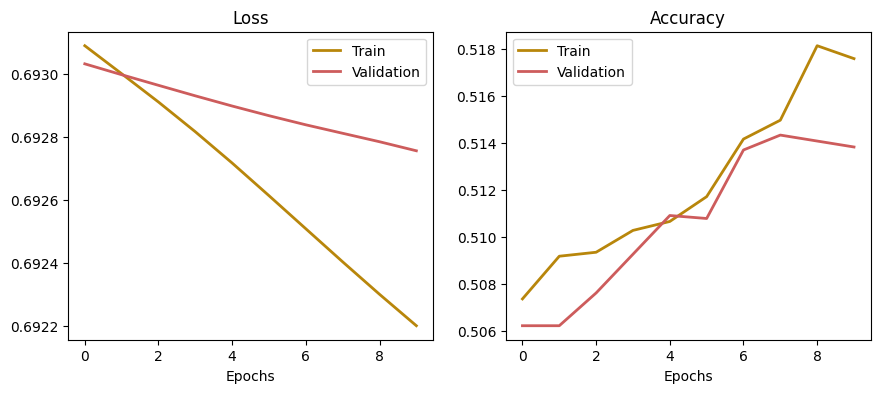

In [70]:
# Convert padded_text columns to numpy arrays
X_train_padded = np.array(X_train['padded_text'].tolist())
X_val_padded = np.array(X_val['padded_text'].tolist())

model2 = build_embeddings_model(average_over_positions=True,
                               vocab_size=5000,
                               sequence_length=35,
                               embedding_dim=2)
history2 = model2.fit(
  x = X_train_padded,  # our sparse padded training data
  y = y_train,          # corresponding binary labels
  epochs=10,             # number of passes through the training data
  batch_size=64,        # mini-batch size
  validation_data=(X_val_padded, y_val),
  verbose=1             # display some progress output during training
  )

model2.summary()

# grab history
history = history2.history

# plot loss for train and validation
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=2, color='darkgoldenrod')
plt.plot(history['val_loss'], lw=2, color='indianred')
plt.legend(['Train', 'Validation'], fontsize=10)
ax.set_xlabel('Epochs', size=10)
ax.set_title('Loss');

# plot accuracy for train and validation
ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=2, color='darkgoldenrod')
plt.plot(history['val_binary_accuracy'], lw=2, color='indianred')
plt.legend(['Train', 'Validation'], fontsize=10)
ax.set_xlabel('Epochs', size=10)
ax.set_title('Accuracy');

# Get the last epoch's training and validation accuracy
final_train_accuracy = history['binary_accuracy'][-1]
final_val_accuracy = history['val_binary_accuracy'][-1]
print("Logistic model using learned embeddings as the feature")
print(f"Final Training Accuracy: {final_train_accuracy*100:.2f}%")
print(f"Final Validation Accuracy: {final_val_accuracy*100:.2f}%")

#### Logistic Regression with Price, Age, Genres, Awards and Learned Embeddings (using Keras functional API)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ embedding_input           │ (None, 35)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 35, 2)          │         10,000 │ embedding_input[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d  │ (None, 2)              │              0 │ embedding[0][0]        │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ other_input (InputLayer)  │ (None, 24)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 26)             │              0 │ global_average_poolin… │
│                           │                        │                │ other_input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output (Dense)            │ (None, 1)              │             27 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 10,027 (39.17 KB)

 Trainable params: 10,027 (39.17 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
370/370 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - binary_accuracy: 0.5891 - loss: 0.6776 - val_binary_accuracy: 0.6054 - val_loss: 0.6645
Epoch 2/20
370/370 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - binary_accuracy: 0.6032 - loss: 0.6664 - val_binary_accuracy: 0.6036 - val_loss: 0.6623
Epoch 3/20
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.6027 - loss: 0.6651 - val_binary_accuracy: 0.6044 - val_loss: 0.6614
Epoch 4/20
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - binary_accuracy: 0.6030 - loss: 0.6646 - val_binary_accuracy: 0.6042 - val_loss: 0.6610
Epoch 5/20
370/370 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - binary_accuracy: 0.6016 - loss: 0.6643 - val_binary_accuracy: 0.6049 - val_loss: 0.6608
Epoch 6/20
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.6013 - loss: 0.6641 - val_binary_accuracy: 0.6049 - val_loss: 0.6606
Epoch 7/20
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.6009 - loss: 0.6639 - val_binary_accuracy: 0.6042 - val_loss: 0.6605
Epoch 

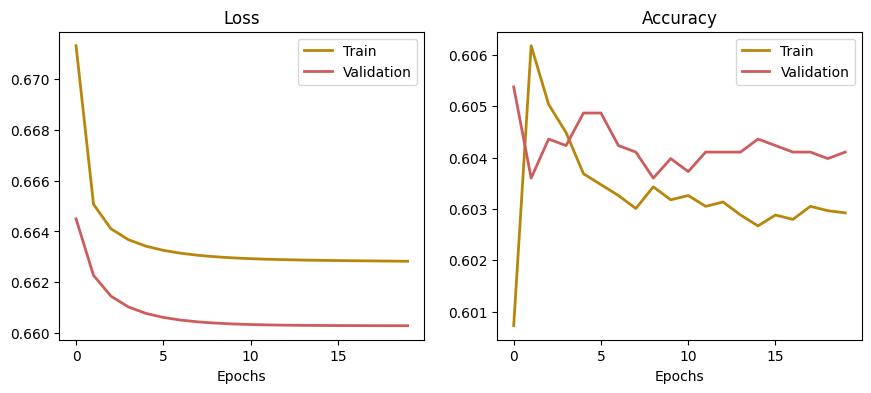

In [71]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, initializers
import matplotlib.pyplot as plt

# - X_train: the training DataFrame
# - X_val: the validation DataFrame
# - y_train: training labels
# - y_val: validation labels

# Function to build the model with embeddings and other features
def build_combined_model(vocab_size=5000, sequence_length=35, embedding_dim=2, num_other_features=10):
    """Build a combined Keras model that uses both learned embeddings and other features."""

    # Clear session and set random seed for reproducibility
    tf.keras.backend.clear_session()
    tf.random.set_seed(1234)

    # Define input for embeddings
    embedding_input = tf.keras.Input(shape=(sequence_length,), name='embedding_input')
    x = layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=sequence_length)(embedding_input)
    x = layers.GlobalAveragePooling1D()(x)  # Average over the sequence

    # Define input for other features
    other_input = tf.keras.Input(shape=(num_other_features,), name='other_input')

    # Concatenate embeddings and other features
    concatenated = layers.concatenate([x, other_input])

    # Add a dense layer for binary classification
    output = layers.Dense(1, activation='sigmoid', name='output',
                          kernel_initializer=initializers.RandomNormal(stddev=0.01),
                          bias_initializer=initializers.RandomNormal(stddev=0.01))(concatenated)

    # Compile model
    model = tf.keras.Model(inputs=[embedding_input, other_input], outputs=output)
    model.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
                  metrics=[tf.keras.metrics.BinaryAccuracy()])
    return model

# Convert padded_text columns to numpy arrays
X_train_padded = np.array(X_train['padded_text'].tolist())
X_val_padded = np.array(X_val['padded_text'].tolist())

# Combine learned embeddings with other features for training and validation
X_train_combined = [X_train_padded, X_train_price_age_genres_awards.to_numpy()]
X_val_combined = [X_val_padded, X_val_price_age_genres_awards.to_numpy()]

# Build the combined model
num_other_features = X_train_price_age_genres_awards.shape[1]
model = build_combined_model(vocab_size=5000, sequence_length=35, embedding_dim=2, num_other_features=num_other_features)

# Print model summary
model.summary()

# Train the model
history = model.fit(
    x=X_train_combined,
    y=y_train,
    validation_data=(X_val_combined, y_val),
    epochs=20,
    batch_size=64,
    verbose=1
)

# Grab history
history_data = history.history

# Plot loss for train and validation
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history_data['loss'], lw=2, color='darkgoldenrod')
plt.plot(history_data['val_loss'], lw=2, color='indianred')
plt.legend(['Train', 'Validation'], fontsize=10)
ax.set_xlabel('Epochs', size=10)
ax.set_title('Loss')

# Plot accuracy for train and validation
ax = fig.add_subplot(1, 3, 2)
plt.plot(history_data['binary_accuracy'], lw=2, color='darkgoldenrod')
plt.plot(history_data['val_binary_accuracy'], lw=2, color='indianred')
plt.legend(['Train', 'Validation'], fontsize=10)
ax.set_xlabel('Epochs', size=10)
ax.set_title('Accuracy')

# Get the last epoch's training and validation accuracy
final_train_accuracy = history_data['binary_accuracy'][-1]
final_val_accuracy = history_data['val_binary_accuracy'][-1]
print("Combined model using price, age, genres, awards, and learned embeddings as features")
print(f"Final Training Accuracy: {final_train_accuracy*100:.2f}%")
print(f"Final Validation Accuracy: {final_val_accuracy*100:.2f}%")


## Neural Networks

In [72]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 6.3 MB/s eta 0:00:00


In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D, Concatenate, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras_tuner import RandomSearch

### Neural Network Model with Price, Age, Genres, Awards and TFIDF on Description

In [74]:
X_train_neural_1 = X_train.iloc[:, :-2].drop(columns=['about_description'])
X_val_neural_1 = X_val_neural_1 = X_val.iloc[:, :-2].drop(columns=['about_description'])
X_test_neural_1= X_test_neural_1 = X_test.iloc[:, :-2].drop(columns=['about_description'])

In [75]:
def build_model(hp):
    model = Sequential()

    # Input layer for numerical and genre features
    model.add(Input(shape=(X_train_neural_1.shape[1],)))

    # Hidden layers with hyperparameter tuning for the number of neurons and dropout rate
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),
                        activation='relu'))
        model.add(Dropout(rate=hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with learning rate tuning
    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Initialize the Keras Tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='my_dir',
    project_name='steam_nn_tuning'
)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Search for the best hyperparameters
tuner.search(X_train_neural_1, y_train, epochs=10, validation_data=(X_val_neural_1, y_val), callbacks=[early_stopping], batch_size=32)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)

# Train the model with the best hyperparameters
history = model.fit(X_train_neural_1, y_train, epochs=10, validation_data=(X_val_neural_1, y_val), callbacks=[early_stopping], batch_size=32)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_neural_1, y_test)

print(f"Test accuracy: {test_accuracy:.4f}")

Trial 10 Complete [00h 00m 27s]
val_accuracy: 0.6289627254009247

Best val_accuracy So Far: 0.6387902796268463
Total elapsed time: 00h 05m 44s
Epoch 1/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6097 - loss: 0.6542 - val_accuracy: 0.6358 - val_loss: 0.6326
Epoch 2/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6604 - loss: 0.6166 - val_accuracy: 0.6335 - val_loss: 0.6342
Epoch 3/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6828 - loss: 0.5953 - val_accuracy: 0.6286 - val_loss: 0.6422
Epoch 4/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7104 - loss: 0.5663 - val_accuracy: 0.6231 - val_loss: 0.6544
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6393 - loss: 0.6471
Test accuracy: 0.6390


### Neural Network Model with Price, Age, Genres, Awards and Learned Embeddings

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ embedding_input           │ (None, 35)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 35, 2)          │         10,000 │ embedding_input[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d  │ (None, 2)              │              0 │ embedding[0][0]        │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ other_input (InputLayer)  │ (None, 24)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 26)             │              0 │ global_average_poolin… │
│                           │                        │                │ other_input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │          3,456 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 128)            │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 64)             │          8,256 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 64)             │              0 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 32)             │          2,080 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 1)              │             33 │ dense_2[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 23,825 (93.07 KB)

 Trainable params: 23,825 (93.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
370/370 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - binary_accuracy: 0.5757 - loss: 0.6786 - val_binary_accuracy: 0.6230 - val_loss: 0.6496 - learning_rate: 0.0010
Epoch 2/30
370/370 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - binary_accuracy: 0.6063 - loss: 0.6573 - val_binary_accuracy: 0.6253 - val_loss: 0.6451 - learning_rate: 0.0010
Epoch 3/30
370/370 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - binary_accuracy: 0.6165 - loss: 0.6521 - val_binary_accuracy: 0.6276 - val_loss: 0.6406 - learning_rate: 0.0010
Epoch 4/30
370/370 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - binary_accuracy: 0.6289 - loss: 0.6423 - val_binary_accuracy: 0.6389 - val_loss: 0.6347 - learning_rate: 0.0010
Epoch 5/30
370/370 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - binary_accuracy: 0.6459 - loss: 0.6296 - val_binary_accuracy: 0.6444 - val_loss: 0.6293 - learning_rate: 0.0010
Epoch 6/30
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.6621 - loss: 0.6123 - val_binary_accuracy: 0.6472 - val_loss: 0.6279 - learning_rate: 0.0010
Ep

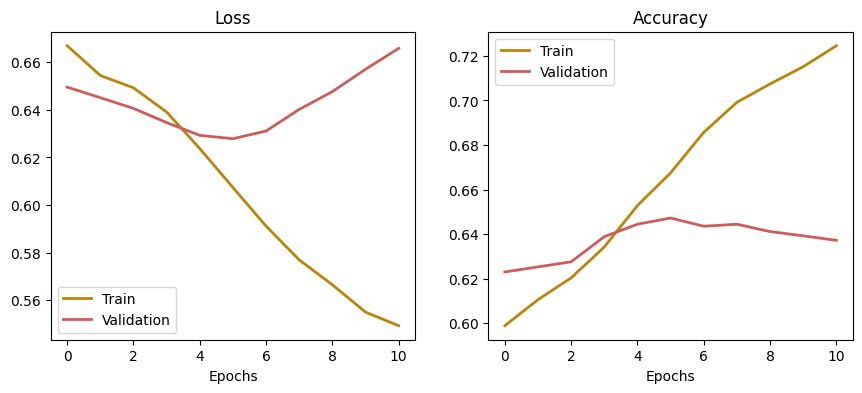

In [76]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, initializers, models
import matplotlib.pyplot as plt

# - X_train: the training DataFrame
# - X_val: the validation DataFrame
# - y_train: training labels
# - y_val: validation labels

# Function to build the neural network model
def build_neural_network_model(vocab_size=5000, sequence_length=35, embedding_dim=2, num_other_features=10):
    """Build a neural network model using embeddings and other features."""
    tf.keras.backend.clear_session()
    tf.random.set_seed(1234)

    # Embedding input layer
    embedding_input = tf.keras.Input(shape=(sequence_length,), name='embedding_input')
    x = layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=sequence_length)(embedding_input)
    x = layers.GlobalAveragePooling1D()(x)

    # Additional features input layer
    other_input = tf.keras.Input(shape=(num_other_features,), name='other_input')

    # Concatenate embeddings and additional features
    concatenated = layers.concatenate([x, other_input])

    # Add hidden layers with ReLU activation
    x = layers.Dense(128, activation='relu')(concatenated)
    x = layers.Dropout(0.5)(x)  # Dropout for regularization
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(32, activation='relu')(x)

    # Output layer for binary classification
    output = layers.Dense(1, activation='sigmoid',
                          kernel_initializer=initializers.RandomNormal(stddev=0.01),
                          bias_initializer=initializers.RandomNormal(stddev=0.01))(x)

    model = models.Model(inputs=[embedding_input, other_input], outputs=output)
    model.compile(
        loss='binary_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Using Adam optimizer for better convergence
        metrics=[tf.keras.metrics.BinaryAccuracy()]
    )
    return model

# Convert padded_text columns to numpy arrays
X_train_padded = np.array(X_train['padded_text'].tolist())
X_val_padded = np.array(X_val['padded_text'].tolist())

# Combine learned embeddings with other features for training and validation
X_train_combined = [X_train_padded, X_train_price_age_genres_awards.to_numpy()]
X_val_combined = [X_val_padded, X_val_price_age_genres_awards.to_numpy()]

# Build the neural network model
num_other_features = X_train_price_age_genres_awards.shape[1]
model = build_neural_network_model(vocab_size=5000, sequence_length=35, embedding_dim=2, num_other_features=num_other_features)

# Print model summary
model.summary()

# Define callbacks for early stopping and learning rate reduction
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Train the model
history = model.fit(
    x=X_train_combined,
    y=y_train,
    validation_data=(X_val_combined, y_val),
    epochs=30,  # More epochs to allow better learning
    batch_size=64,
    verbose=1,
    callbacks=[early_stopping, reduce_lr]
)

# Grab history
history_data = history.history

# Plot loss for train and validation
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history_data['loss'], lw=2, color='darkgoldenrod')
plt.plot(history_data['val_loss'], lw=2, color='indianred')
plt.legend(['Train', 'Validation'], fontsize=10)
ax.set_xlabel('Epochs', size=10)
ax.set_title('Loss')

# Plot accuracy for train and validation
ax = fig.add_subplot(1, 3, 2)
plt.plot(history_data['binary_accuracy'], lw=2, color='darkgoldenrod')
plt.plot(history_data['val_binary_accuracy'], lw=2, color='indianred')
plt.legend(['Train', 'Validation'], fontsize=10)
ax.set_xlabel('Epochs', size=10)
ax.set_title('Accuracy')

# Get the last epoch's training and validation accuracy
final_train_accuracy = history_data['binary_accuracy'][-1]
final_val_accuracy = history_data['val_binary_accuracy'][-1]
print("Neural Network model using embeddings and other features")
print(f"Final Training Accuracy: {final_train_accuracy*100:.2f}%")
print(f"Final Validation Accuracy: {final_val_accuracy*100:.2f}%")


The neural network with learned embeddings performs the best out of all experiments so far. However, it is clear that we are overfitting the model ro the training data and we should stop at 4 number of epochs.

In [77]:
pip install scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 69.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


### Hyperparameter Tuning using Randomized Search

In [78]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification

X_train_padded = np.array(X_train['padded_text'].tolist())
X_val_padded = np.array(X_val['padded_text'].tolist())

# Combine additional features into a single matrix
X_train_features = X_train_price_age_genres_awards.to_numpy()
X_val_features = X_val_price_age_genres_awards.to_numpy()

# Ensure the number of samples match for each input
assert X_train_padded.shape[0] == X_train_features.shape[0] == y_train.shape[0]
assert X_val_padded.shape[0] == X_val_features.shape[0] == y_val.shape[0]

# Define the model building function using Sequential API
def create_sequential_model(vocab_size=5000, embedding_dim=2, num_other_features=10,
                            dense_units=32, dropout_rate=0.3, learning_rate=0.001):
    """Build a Keras model using the Sequential API with specified hyperparameters."""
    tf.keras.backend.clear_session()
    tf.random.set_seed(1234)

    # Sequential model for text embeddings
    text_model = Sequential(name="TextModel")
    text_model.add(layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim))
    text_model.add(layers.GlobalAveragePooling1D())

    # Sequential model for additional features
    features_model = Sequential(name="FeaturesModel")
    features_model.add(layers.Input(shape=(num_other_features,)))

    # Define a combined model using functional API to merge Sequential models
    combined_input = tf.keras.Input(shape=(X_train_padded.shape[1] + num_other_features,), name='combined_input')

    # Process text part separately
    text_out = text_model(combined_input[:, :X_train_padded.shape[1]])

    # Process features part separately
    features_out = combined_input[:, X_train_padded.shape[1]:]

    # Concatenate the processed outputs
    concatenated = layers.concatenate([text_out, features_out], name='Concatenate')

    # Define dense layers for final output
    x = layers.Dense(dense_units, activation='relu')(concatenated)
    x = layers.Dropout(dropout_rate)(x)
    x = layers.Dense(int(dense_units / 2), activation='relu')(x)
    output = layers.Dense(1, activation='sigmoid')(x)

    # Build final model
    model = models.Model(inputs=combined_input, outputs=output)
    model.compile(
        loss='binary_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        metrics=[tf.keras.metrics.BinaryAccuracy()]
    )
    return model

# Wrap the model into KerasClassifier using SciKeras
model = KerasClassifier(
    model=create_sequential_model,
    verbose=0,
    model__vocab_size=5000,
    model__num_other_features=X_train_features.shape[1]
)

# Define a smaller hyperparameter grid
param_grid = {
    'model__embedding_dim': [2, 4],  # Reduced dimensions to try
    'model__dense_units': [32, 64],  # Reduced number of units
    'model__dropout_rate': [0.3, 0.4],  # Smaller range
    'optimizer__learning_rate': [0.001, 0.005],  # Narrower learning rates
    'batch_size': [32, 64],  # Smaller batch sizes
    'epochs': [5, 10]  # Fewer epochs
}

# Combine inputs into a single NumPy array for the model
train_combined = np.hstack((X_train_padded, X_train_features))
val_combined = np.hstack((X_val_padded, X_val_features))

# Perform randomized search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                   n_iter=10, scoring='accuracy', cv=3, verbose=1, random_state=42)

# Fit the model using combined input formatted as a single array
random_search_result = random_search.fit(train_combined, y_train)

# Display best parameters and accuracy
print(f"Best Accuracy: {random_search_result.best_score_:.2f} using {random_search_result.best_params_}")

# Evaluate the model on the validation set
val_accuracy = random_search_result.score(val_combined, y_val)
print(f"Validation Accuracy: {val_accuracy:.2f}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Accuracy: 0.64 using {'optimizer__learning_rate': 0.005, 'model__embedding_dim': 2, 'model__dropout_rate': 0.4, 'model__dense_units': 64, 'epochs': 10, 'batch_size': 64}
Validation Accuracy: 0.64


## Final Model

Epoch 1/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - binary_accuracy: 0.5591 - loss: 0.9794 - val_binary_accuracy: 0.6122 - val_loss: 0.7098
Epoch 2/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - binary_accuracy: 0.5958 - loss: 0.6996 - val_binary_accuracy: 0.6154 - val_loss: 0.6767
Epoch 3/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - binary_accuracy: 0.6015 - loss: 0.6803 - val_binary_accuracy: 0.6160 - val_loss: 0.6707
Epoch 4/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - binary_accuracy: 0.6027 - loss: 0.6741 - val_binary_accuracy: 0.6151 - val_loss: 0.6680
Epoch 5/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - binary_accuracy: 0.6123 - loss: 0.6719 - val_binary_accuracy: 0.6174 - val_loss: 0.6652
Epoch 6/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - binary_accuracy: 0.6166 - loss: 0.6691 - val_binary_accuracy: 0.6245 - val_loss: 0.6626
Epoch 7/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - binary_accuracy: 0.6281 - loss: 0.6633 - val_binary_accuracy: 0.6291 - val_loss: 0.6601
Epoc

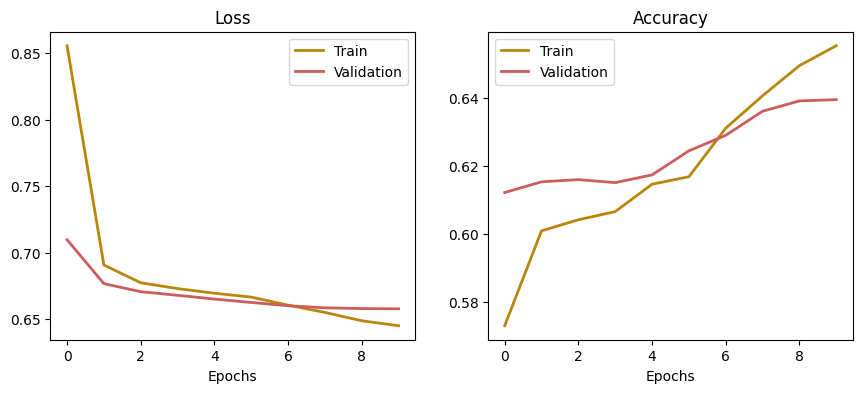

In [79]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential

# Ensure reproducibility
tf.keras.backend.clear_session()
tf.random.set_seed(1234)

# Final model setup with improved regularization and adjustments
def create_improved_model(vocab_size=5000, embedding_dim=2, num_other_features=10,
                          dense_units=32, dropout_rate=0.4, learning_rate=0.001):
    """Build an improved Keras model using the Sequential API with regularization."""

    # Sequential model for text embeddings
    text_model = Sequential(name="TextModel")
    text_model.add(layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim))
    text_model.add(layers.GlobalAveragePooling1D())

    # Sequential model for additional features
    features_model = Sequential(name="FeaturesModel")
    features_model.add(layers.Input(shape=(num_other_features,)))

    # Define a combined model using functional API to merge Sequential models
    combined_input = tf.keras.Input(shape=(X_train_padded.shape[1] + num_other_features,), name='combined_input')

    # Process text part separately
    text_out = text_model(combined_input[:, :X_train_padded.shape[1]])

    # Process features part separately
    features_out = combined_input[:, X_train_padded.shape[1]:]

    # Concatenate the processed outputs
    concatenated = layers.concatenate([text_out, features_out], name='Concatenate')

    # Define dense layers with improved regularization
    x = layers.Dense(dense_units, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(concatenated)
    x = layers.Dropout(dropout_rate)(x)
    x = layers.Dense(int(dense_units / 2), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
    output = layers.Dense(1, activation='sigmoid')(x)

    # Build final model
    model = models.Model(inputs=combined_input, outputs=output)
    model.compile(
        loss='binary_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        metrics=[tf.keras.metrics.BinaryAccuracy()]
    )
    return model

# Build the improved model
improved_model = create_improved_model(
    vocab_size=5000,
    embedding_dim=2,
    num_other_features=X_train_features.shape[1],
    dense_units=32,
    dropout_rate=0.4,  # Increased dropout for regularization
    learning_rate=0.001
)

# Combine inputs into a single NumPy array for the final model
train_combined = np.hstack((X_train_padded, X_train_features))
val_combined = np.hstack((X_val_padded, X_val_features))

# Train the improved model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = improved_model.fit(
    x=train_combined,
    y=y_train,
    validation_data=(val_combined, y_val),
    epochs=10,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the improved model
final_val_accuracy = improved_model.evaluate(val_combined, y_val, verbose=0)
print(f"Final Validation Accuracy: {final_val_accuracy[1]:.2f}")

# Plot training history
import matplotlib.pyplot as plt

# Plot loss for train and validation
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history.history['loss'], lw=2, color='darkgoldenrod')
plt.plot(history.history['val_loss'], lw=2, color='indianred')
plt.legend(['Train', 'Validation'], fontsize=10)
ax.set_xlabel('Epochs', size=10)
ax.set_title('Loss')

# Plot accuracy for train and validation
ax = fig.add_subplot(1, 3, 2)
plt.plot(history.history['binary_accuracy'], lw=2, color='darkgoldenrod')
plt.plot(history.history['val_binary_accuracy'], lw=2, color='indianred')
plt.legend(['Train', 'Validation'], fontsize=10)
ax.set_xlabel('Epochs', size=10)
ax.set_title('Accuracy')

plt.show()


### Performance on Test data

In [80]:
X_test_padded = np.array(X_test['padded_text'].tolist())
X_test_features = X_test_price_age_genres_awards.to_numpy()
test_combined = np.hstack((X_test_padded, X_test_features))


In [81]:
final_test_accuracy = improved_model.evaluate(test_combined, y_test, verbose=0)
print(f"Final Test Accuracy: {final_test_accuracy[1]:.2f}")

Final Test Accuracy: 0.66


### Confusion Matrix

In [82]:
# Display the mapping of classes
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", mapping)

# Display the reverse mapping as well (optional)
reverse_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
print("Reverse Mapping:", reverse_mapping)

Label Mapping: {'negative': 0, 'positive': 1}
Reverse Mapping: {0: 'negative', 1: 'positive'}


247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


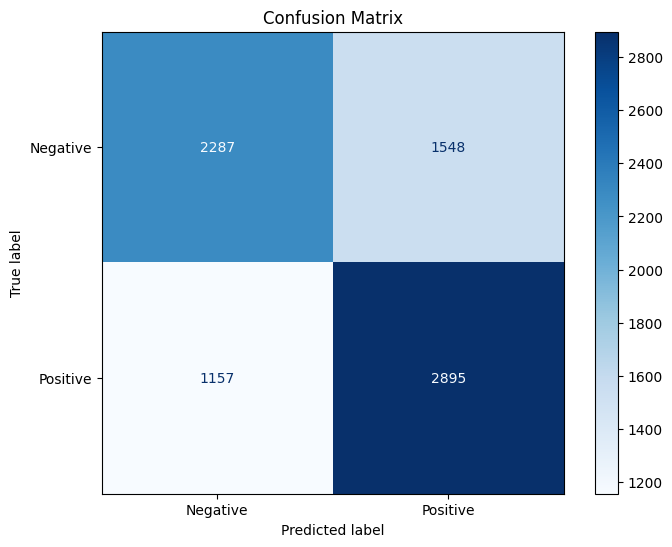

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predictions on the test set
y_pred_prob = improved_model.predict(test_combined)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


### Final Model Architecture

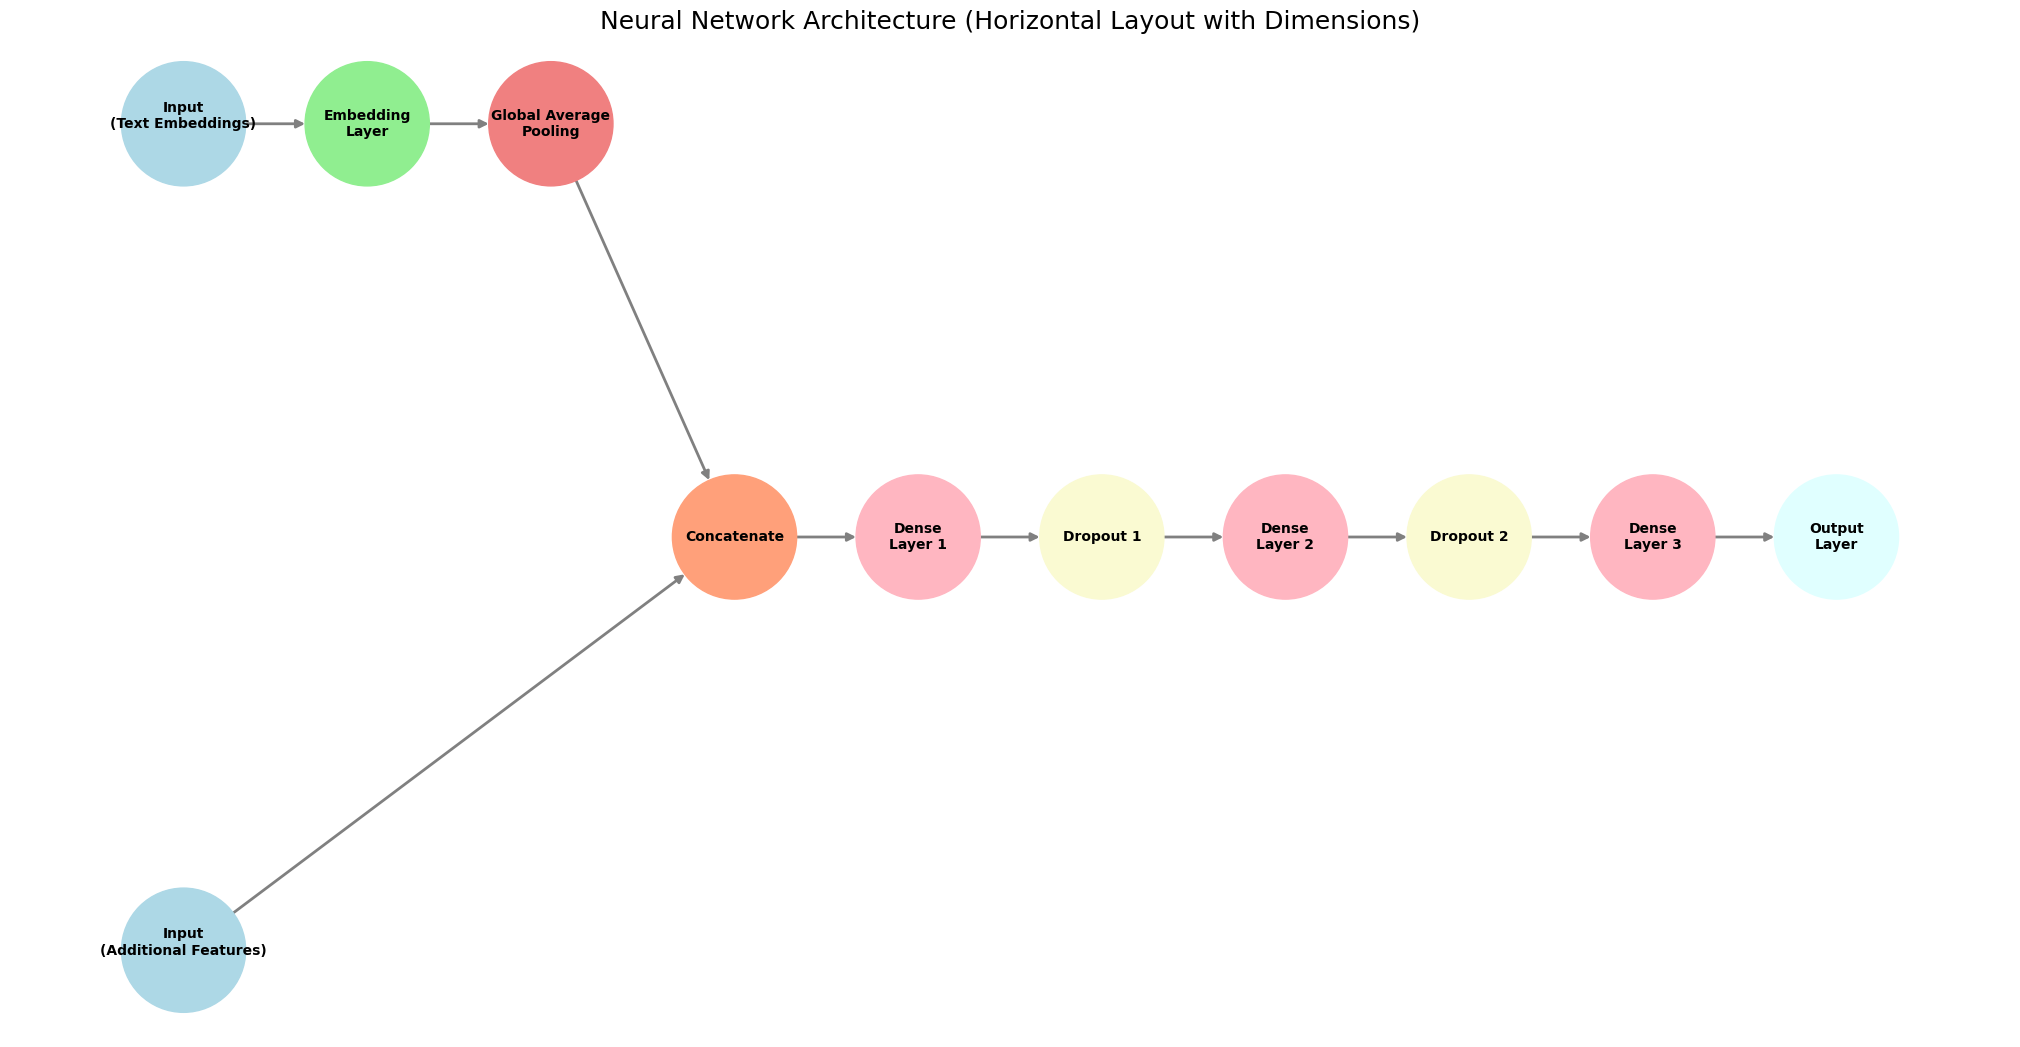

In [88]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_horizontal_neural_network_with_dimensions():
    # Initialize a directed graph
    G = nx.DiGraph()

    # Add nodes for each layer with positions for a horizontal layout
    G.add_node("Input\n(Text Embeddings)\n", pos=(0, 2), layer_type='input')
    G.add_node("Input\n(Additional Features)\n", pos=(0, 0), layer_type='input')

    G.add_node("Embedding\nLayer", pos=(1, 2), layer_type='embedding')
    G.add_node("Global Average\nPooling", pos=(2, 2), layer_type='pooling')

    G.add_node("Concatenate", pos=(3, 1), layer_type='concatenate')

    G.add_node("Dense\nLayer 1", pos=(4, 1), layer_type='dense')
    G.add_node("Dropout 1", pos=(5, 1), layer_type='dropout')

    G.add_node("Dense\nLayer 2", pos=(6, 1), layer_type='dense')
    G.add_node("Dropout 2", pos=(7, 1), layer_type='dropout')

    G.add_node("Dense\nLayer 3", pos=(8, 1), layer_type='dense')
    G.add_node("Output\nLayer", pos=(9, 1), layer_type='output')

    # Add edges to represent data flow
    G.add_edge("Input\n(Text Embeddings)\n", "Embedding\nLayer")
    G.add_edge("Embedding\nLayer", "Global Average\nPooling")
    G.add_edge("Global Average\nPooling", "Concatenate")

    G.add_edge("Input\n(Additional Features)\n", "Concatenate")

    G.add_edge("Concatenate", "Dense\nLayer 1")
    G.add_edge("Dense\nLayer 1", "Dropout 1")
    G.add_edge("Dropout 1", "Dense\nLayer 2")
    G.add_edge("Dense\nLayer 2", "Dropout 2")
    G.add_edge("Dropout 2", "Dense\nLayer 3")
    G.add_edge("Dense\nLayer 3", "Output\nLayer")

    # Define colors for different layers
    colors = {
        'input': 'lightblue',
        'embedding': 'lightgreen',
        'pooling': 'lightcoral',
        'concatenate': 'lightsalmon',
        'dense': 'lightpink',
        'dropout': 'lightgoldenrodyellow',
        'output': 'lightcyan'
    }

    # Extract positions and colors
    pos = nx.get_node_attributes(G, 'pos')
    node_colors = [colors[G.nodes[n]['layer_type']] for n in G.nodes]

    # Draw the network graph with a horizontal layout
    plt.figure(figsize=(20, 10))
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, node_size=8000,
        font_size=10, font_weight='bold', arrowsize=12, edge_color='gray',
        width=2
    )

    plt.title("Neural Network Architecture (Horizontal Layout with Dimensions)", fontsize=18)
    plt.axis('off')
    plt.show()

# Plot the horizontal neural network
plot_horizontal_neural_network_with_dimensions()
